## Problem Statement: Surprise Housing Analysis


Surprise Housing is looking at prospective properties, to buy, to enter the market. 
The company uses data analytics to purchase houses at a price below their actual values 
and flip them on at a higher price. 

Task: Build a regression model using regularisation in order to predict the actual value 
    of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

#### Step1:

In [588]:
import warnings

warnings.filterwarnings('ignore')

In [589]:
#import statements 
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import category_encoders as ce
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 205) 

In [651]:
# read Csv 
path = "/home/aiml/ML/AdvReg/train.csv"
houseDf =  pd.read_csv(path)


In [652]:
houseDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [592]:
houseDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Null Check

In [593]:

round(100*houseDf.isnull().sum()/len(houseDf),2) 

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

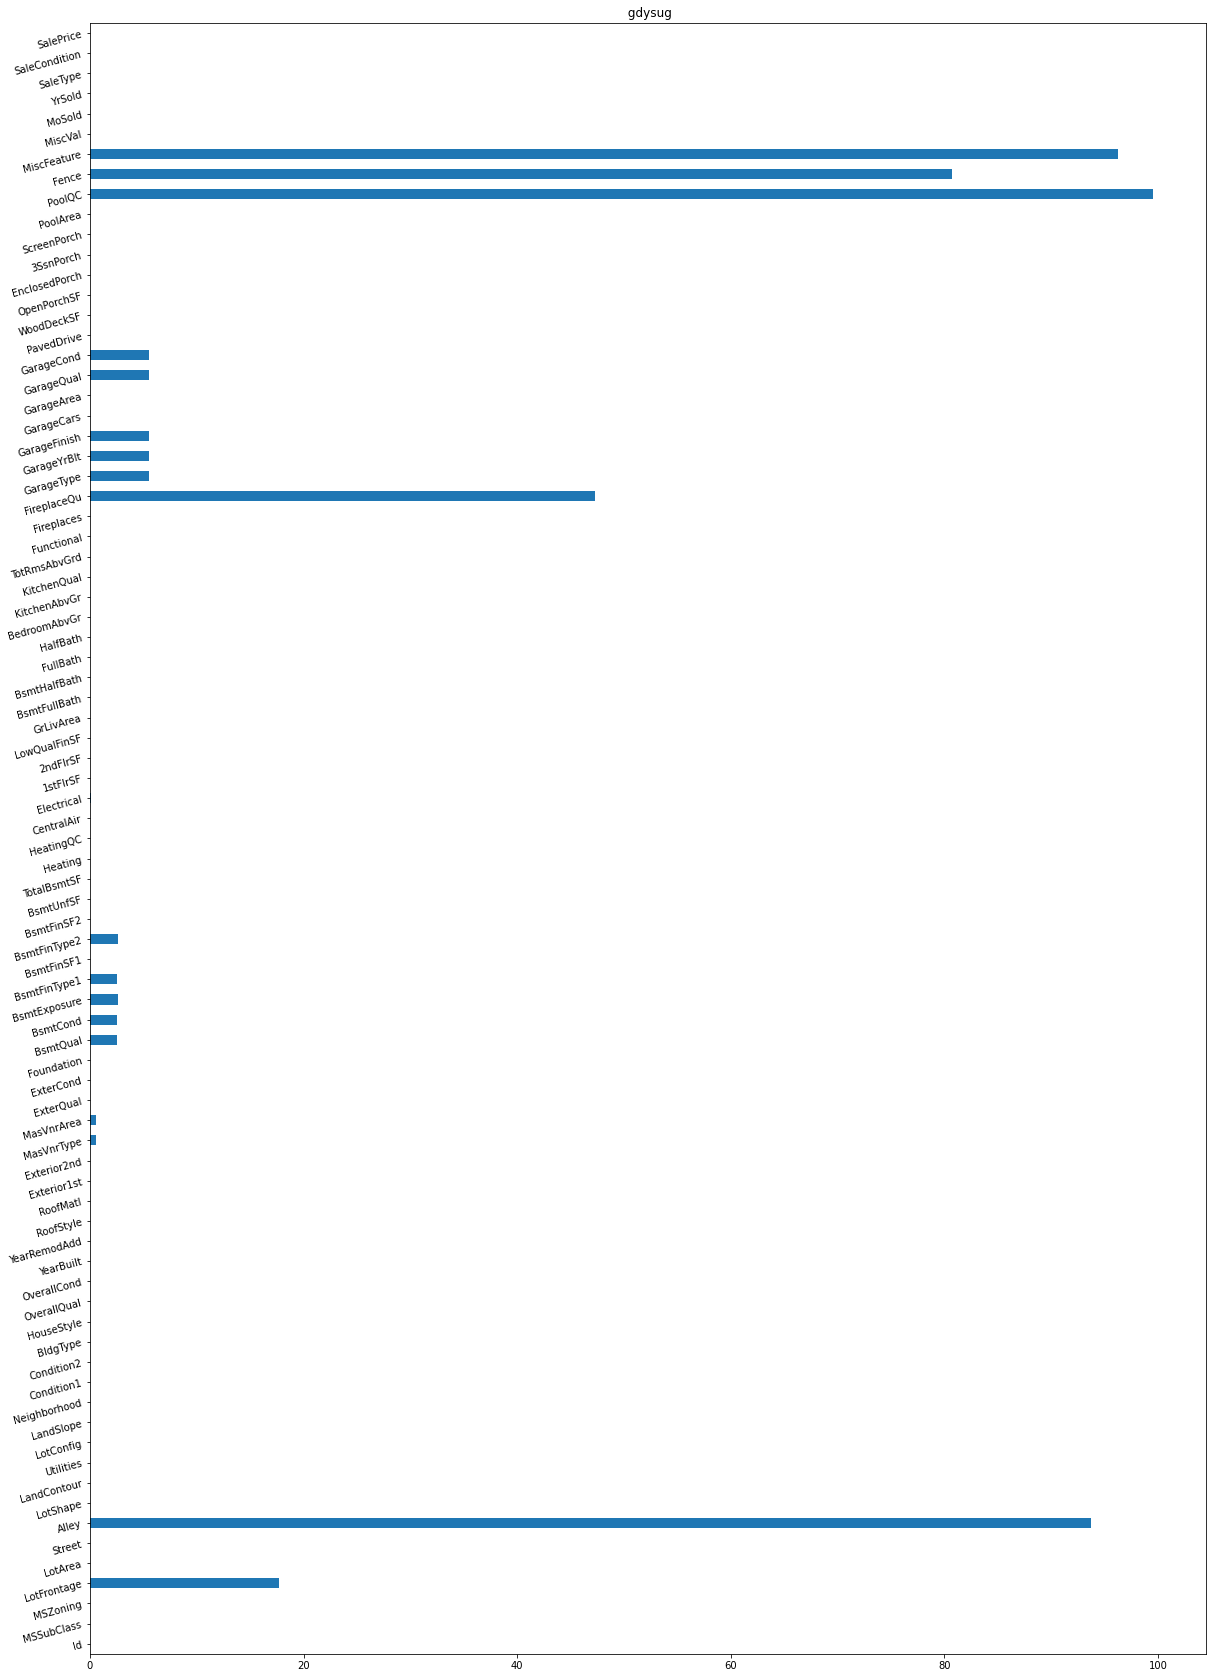

In [378]:
import matplotlib.pyplot as plt
plt.figsize=(20,10)
tar = round(100*houseDf.isnull().sum()/len(houseDf),2) 
tar.plot.barh(rot=15, title=" gdysug",figsize=(20,30));

### DROP cols with over 90% null values.

In [653]:
#drop the cols with very high missing values : 
houseDf.drop('PoolQC', axis = 1 ,inplace = True)
houseDf.drop('MiscFeature', axis = 1 , inplace = True)
houseDf.drop('Alley',axis = 1, inplace = True)


In [654]:
houseDf.drop(['PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Fence','MiscVal','MoSold','SaleType'], axis = 1, inplace = True)

tHE cols PoolQC Fence , MiscFeature, FirePlaceQu , alley ( Good candidates to be dropped off) 

####  The land slope ,Utilities,,LandContour feature shall be dropped as the freq of 'GTL' is high . 

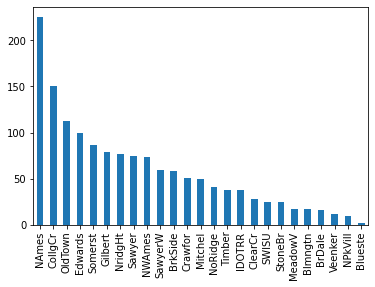

In [596]:
houseDf['Neighborhood'].value_counts().head(30).plot.bar()

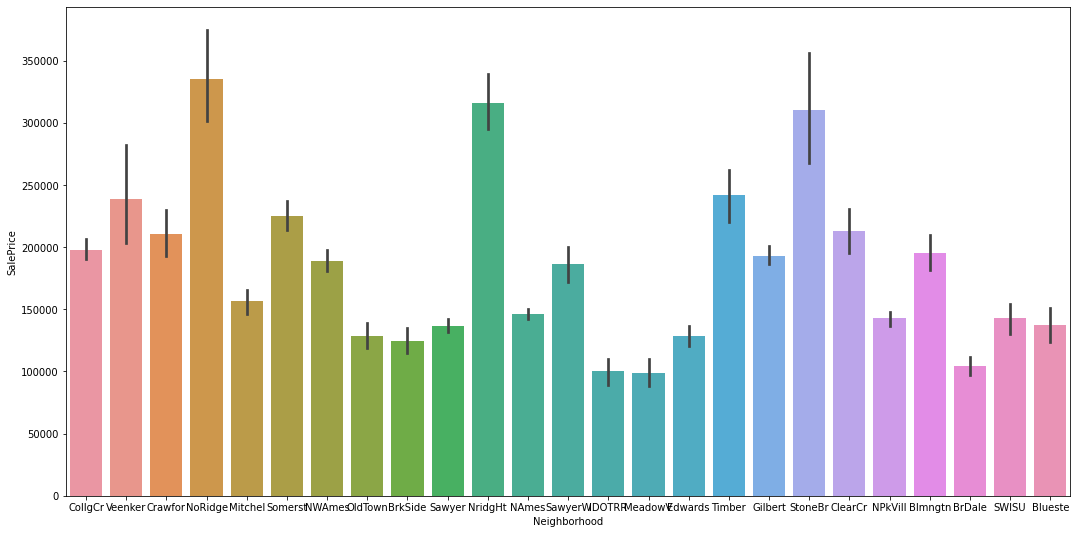

In [602]:

plt.figure(figsize=(18,9))
sns.barplot(x='Neighborhood', y ='SalePrice', data = houseDf )
plt.show()
plt.show()

####    From below Analysis the YearRemodAdd seems to be more gentle spread as the price increases with recency of remodel date.the year built has some spurts though mostly some increasing 


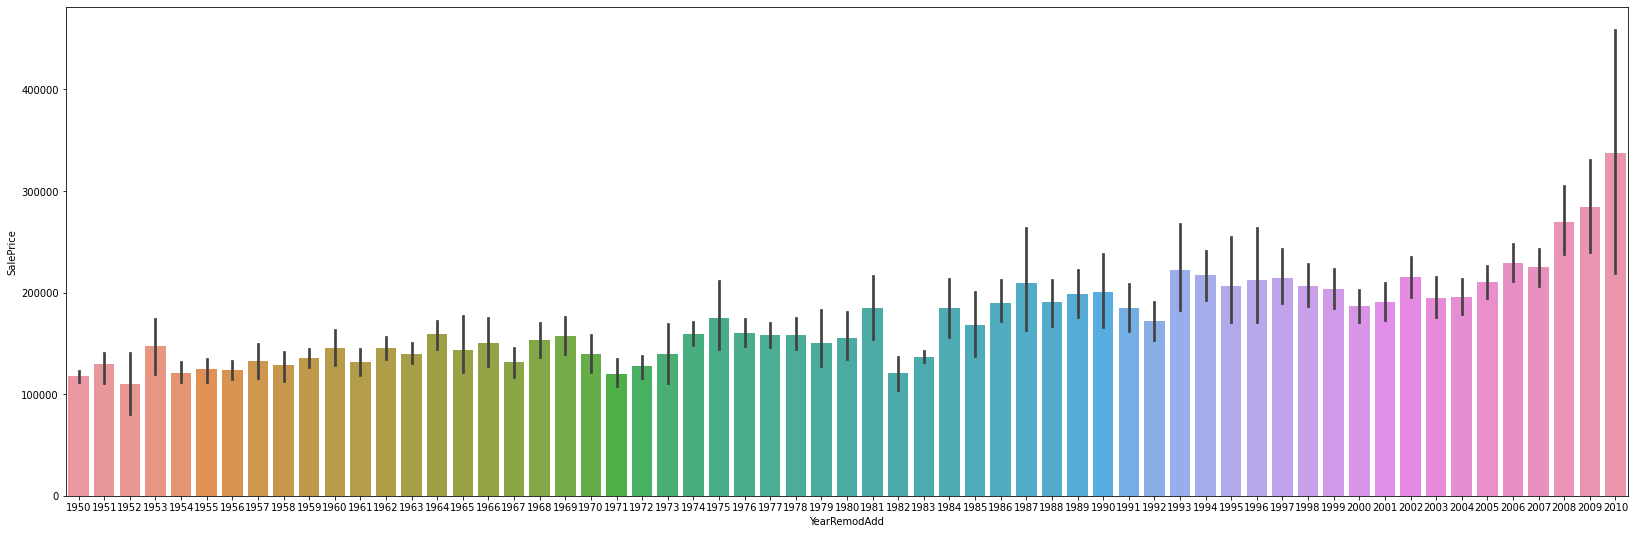

In [598]:
df = houseDf.sort_values(by ='YearRemodAdd', ascending=False)  
plt.figure(figsize=(28,9))
sns.barplot(x= 'YearRemodAdd', y ='SalePrice', data = houseDf )
plt.show()

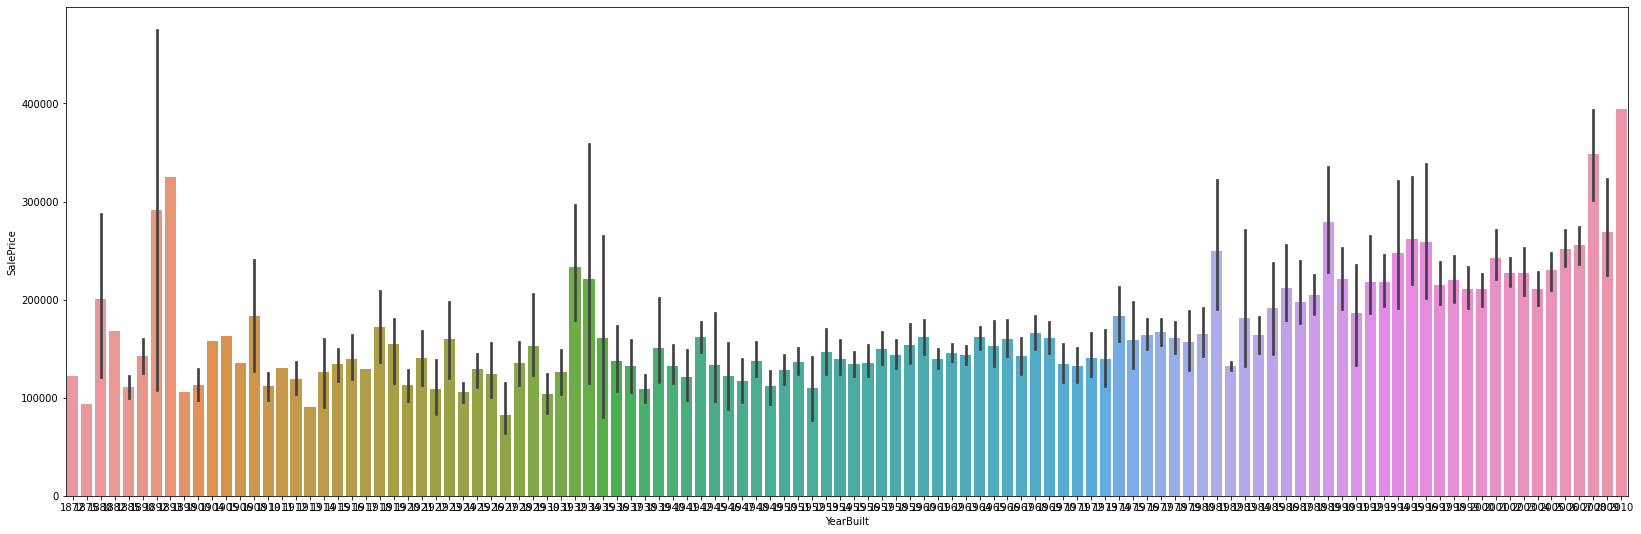

In [603]:
df = houseDf.sort_values(by ='YearBuilt',ascending=False)  
plt.figure(figsize=(28,9))
sns.barplot(x= 'YearBuilt', y ='SalePrice', data = houseDf )
plt.show()

In [604]:
# num of columns : 

len(houseDf.columns)

69

In [605]:
houseDf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenP

#### Imputation of missing values.

In [18]:
houseDf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### Scatter plot ( for conti VARIABLES )

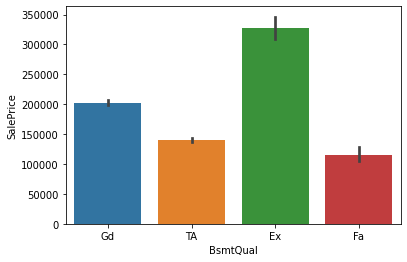

In [607]:
sns.barplot(x= 'BsmtQual', y ='SalePrice', data = houseDf)
plt.show()

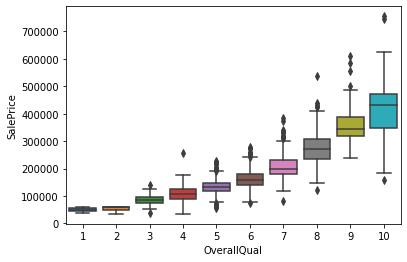

In [610]:
sns.boxplot(x= 'OverallQual', y ='SalePrice', data = houseDf)
plt.show()

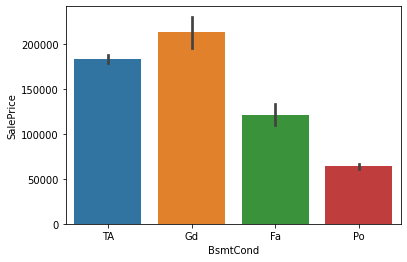

In [613]:
sns.barplot(x='BsmtCond', y = 'SalePrice',data = houseDf)
plt.show()

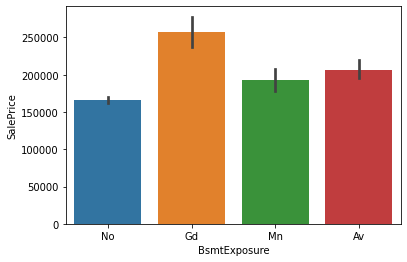

In [614]:
sns.barplot(x='BsmtExposure', y = 'SalePrice',data = houseDf)
plt.show()

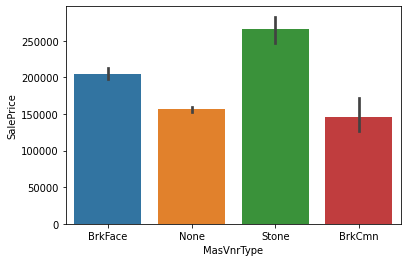

In [615]:
sns.barplot(x='MasVnrType', y = 'SalePrice',data = houseDf)
plt.show()



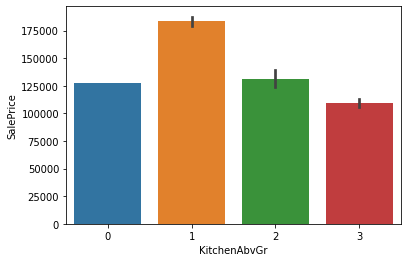

In [616]:
sns.barplot(x='KitchenAbvGr', y = 'SalePrice',data = houseDf.sort_values(by = 'KitchenAbvGr',ascending = False))
plt.show()


In [655]:
valueset = { 'MasVnrType': 'None'}
houseDf.fillna(value=valueset,inplace =True)

In [656]:
lotfrontVal = houseDf['LotFrontage'].median()
print(lotfrontVal)

69.0


###### Lot Frontage is imputed with median value.Categorical values are imputed with 'None' ti indicate absence of the feature in the house



-------------------------------------------------

In [657]:
values = {'LotFrontage':lotfrontVal, 'MasVnrType':'None' , 'MasVnrArea':0, 'ExterQual':'None','BsmtQual':'None','Fence':'None', 'GarageCond':'None','GarageFinish':'None','GarageType':'None','FireplaceQu':'None','BsmtFinType1':'None' ,'BsmtFinType2':'None','GarageQual':'None','BsmtCond':'None','BsmtExposure':'None','Electrical':'None'}

houseDf.fillna(value=values,inplace=True)

In [622]:
# after : Imputation : no null values:
houseDf.isnull().sum()


Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [36]:
columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC
           
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleCondition', 'SalePrice'],
      



In [ ]:
#plots 

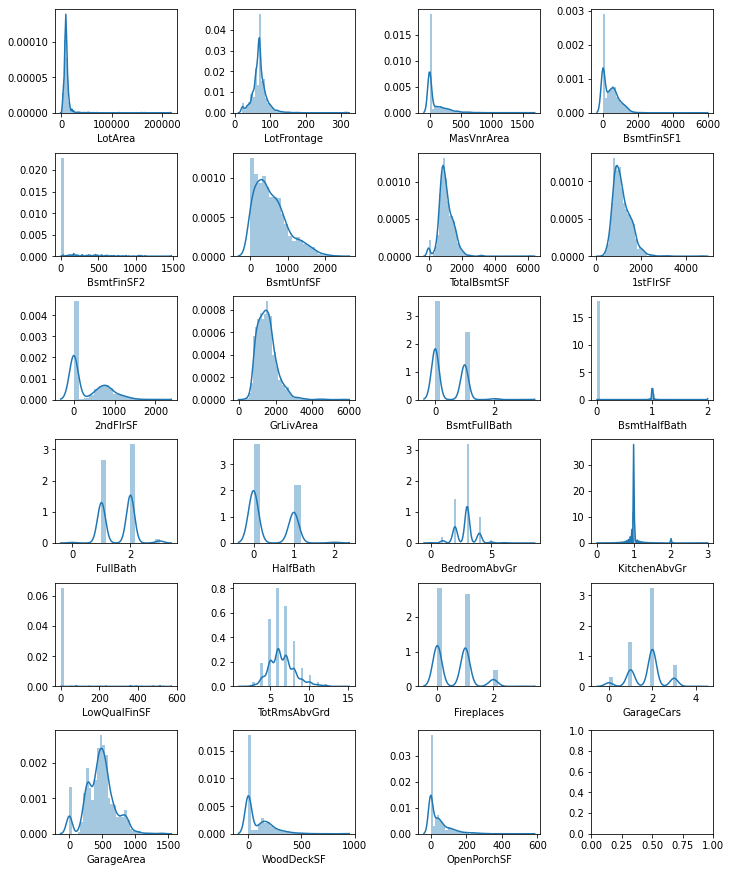

<Figure size 3960x1440 with 0 Axes>

In [624]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(nrows=6, ncols=4, figsize=(10,12),constrained_layout=True)
columns = [
           'LotArea',
           'LotFrontage',
           'MasVnrArea',
           'BsmtFinSF1',
           'BsmtFinSF2',
           'BsmtUnfSF',
           'TotalBsmtSF',
           '1stFlrSF',
           '2ndFlrSF',
           'GrLivArea',
           'BsmtFullBath',
           'BsmtHalfBath',
           'FullBath',
           'HalfBath',
           'BedroomAbvGr',
           'KitchenAbvGr',
           'LowQualFinSF',
           'TotRmsAbvGrd',
           'Fireplaces',
           'GarageCars',
           'GarageArea',
           'WoodDeckSF',
           'OpenPorchSF']
plt.figure(figsize = (55, 20))
for i, column in enumerate(columns):
    sns.distplot(houseDf[column],ax=axes[i//4,i%4])
   

In [361]:
houseDf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenP

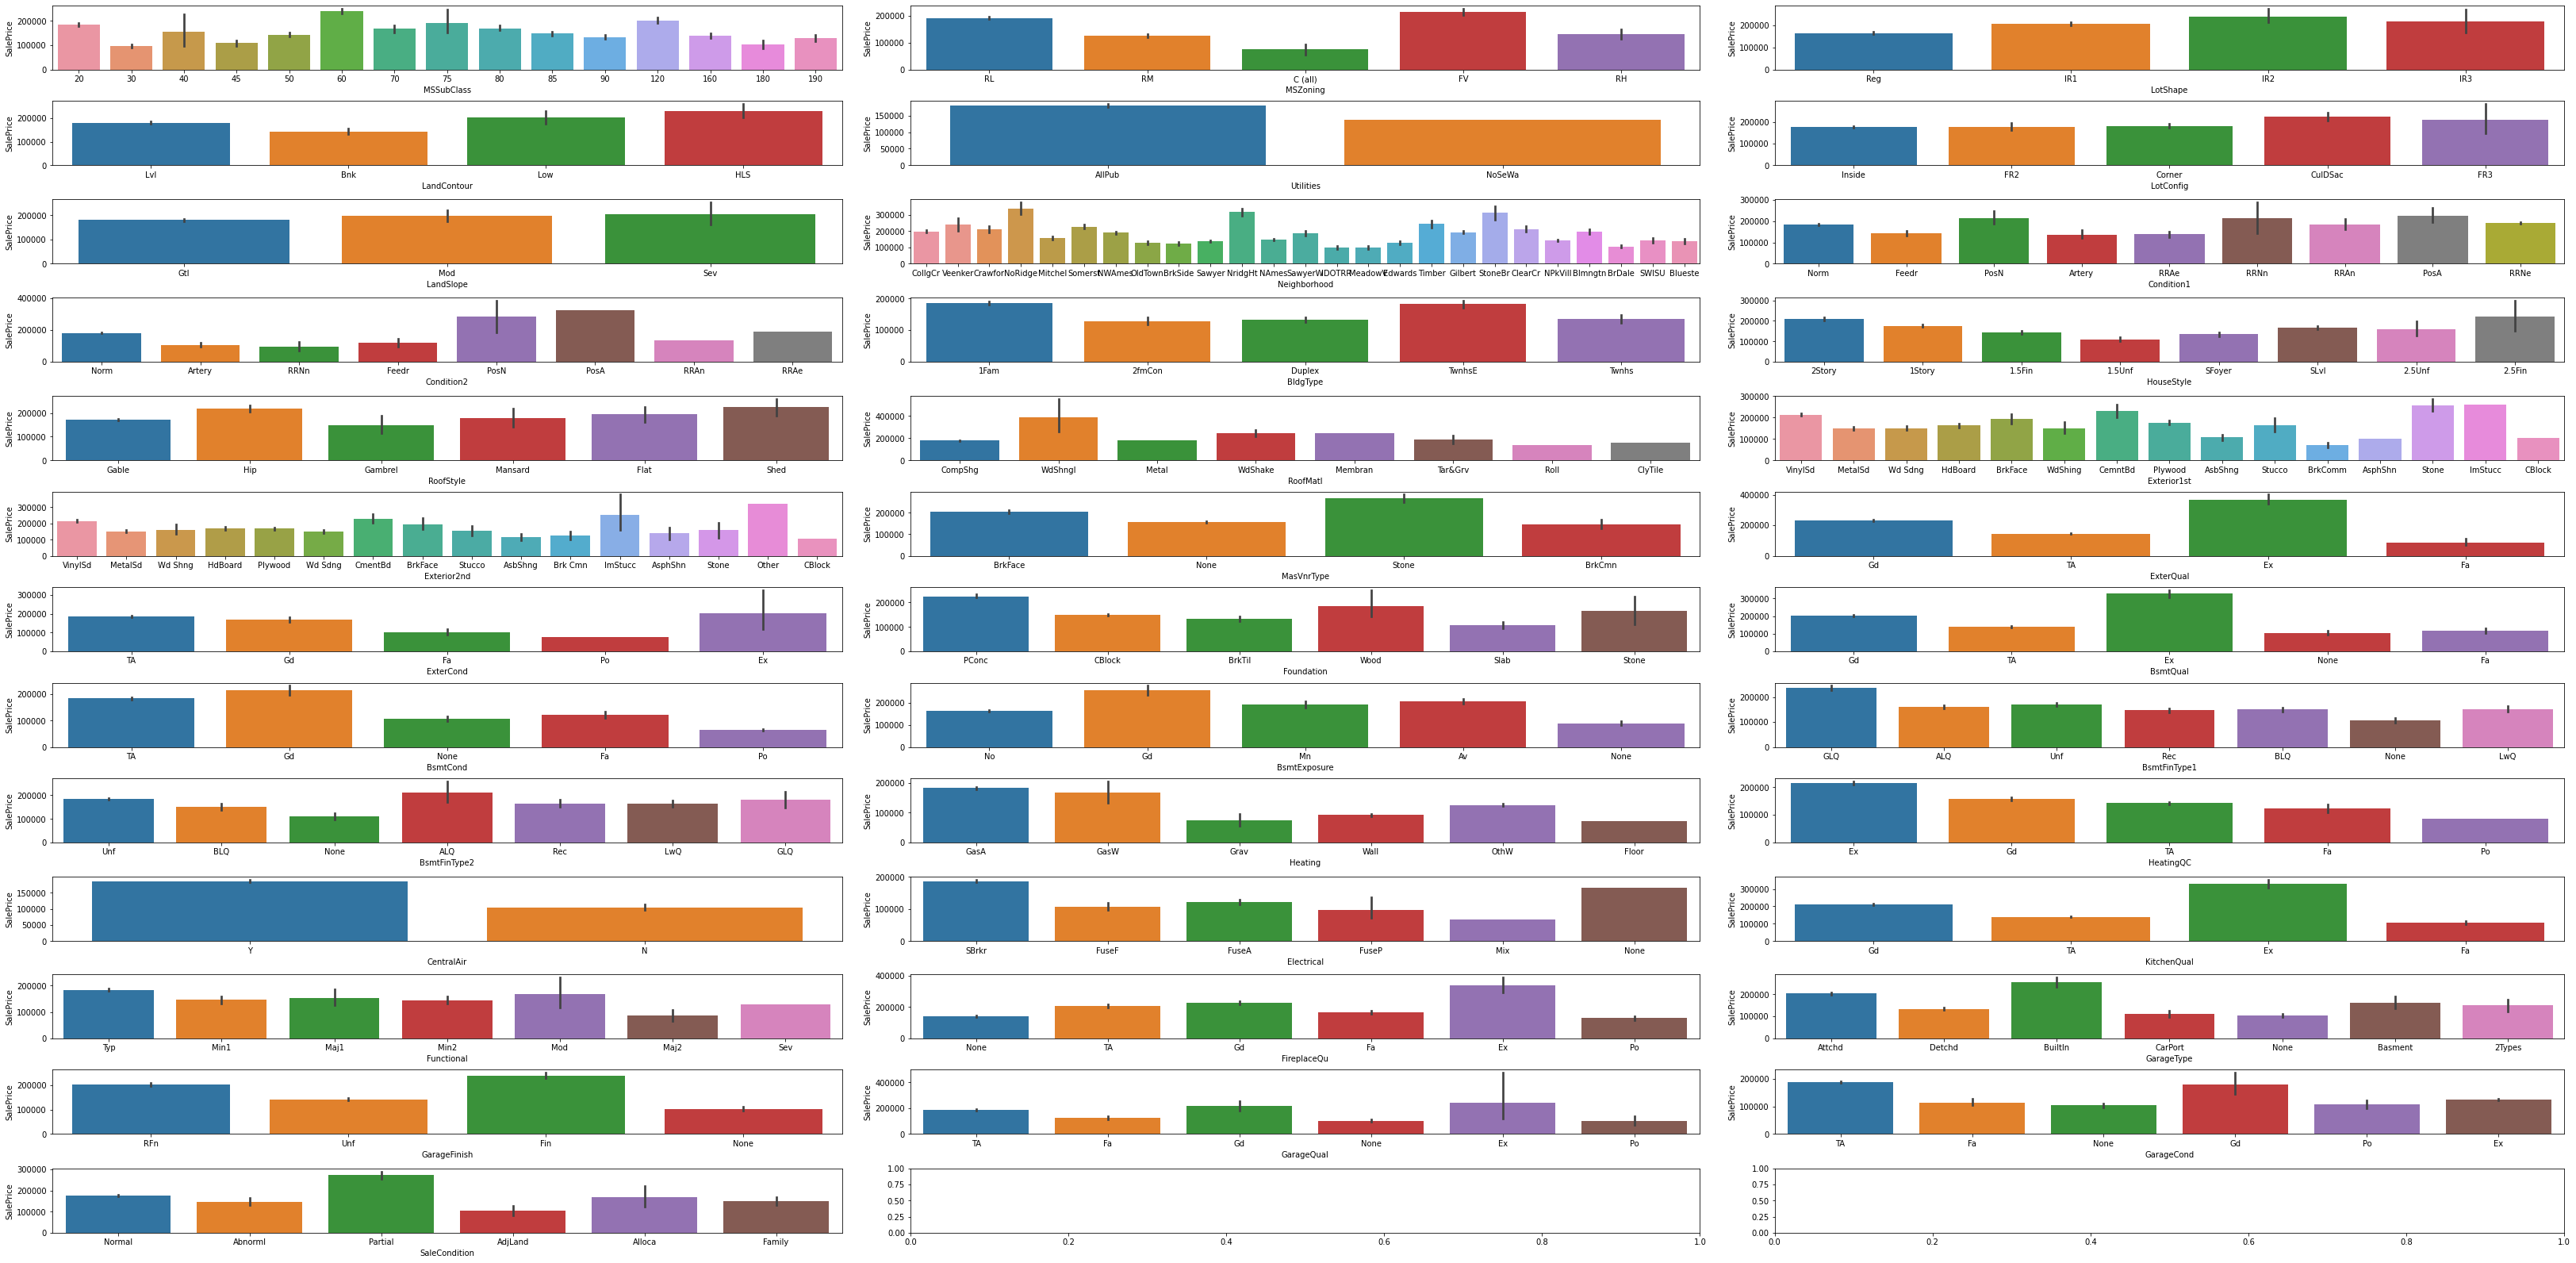

<Figure size 7560x6120 with 0 Axes>

In [625]:
fig , axes = plt.subplots(nrows=13, ncols=3, figsize=(45,22),constrained_layout=True)
columns = ['MSSubClass', 'MSZoning', 'LotShape', 
           'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood',
           'Condition1', 'Condition2', 'BldgType','HouseStyle', 'RoofStyle',
           'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 
           'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 
           'BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir', 
           'Electrical', 'KitchenQual','Functional',  'FireplaceQu', 
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','SaleCondition']
plt.figure(figsize = (105, 85))
for i, column in enumerate(columns):
    sns.barplot(x=column, y = 'SalePrice',data = houseDf,ax=axes[i//3,i%3])
   


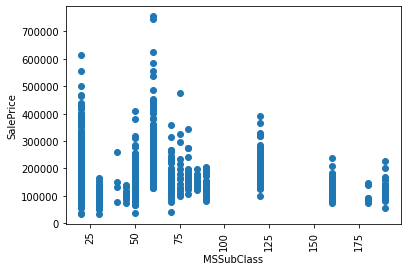

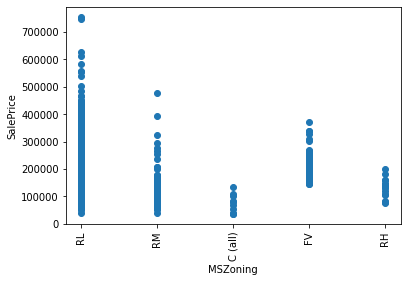

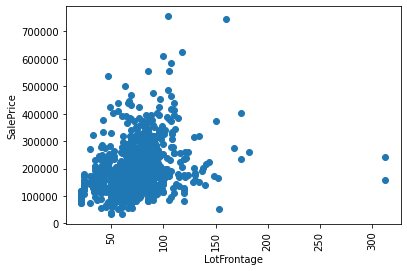

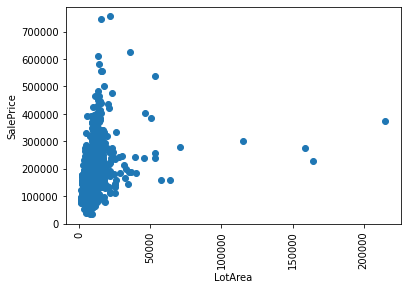

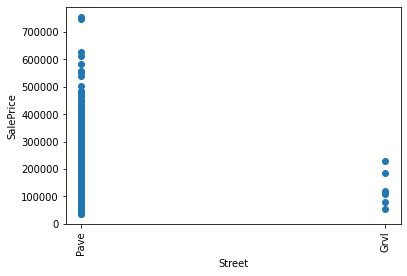

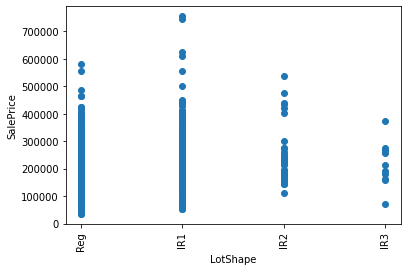

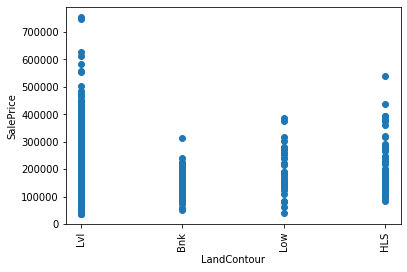

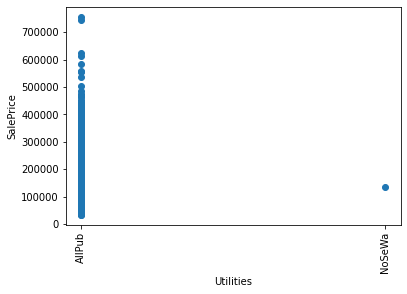

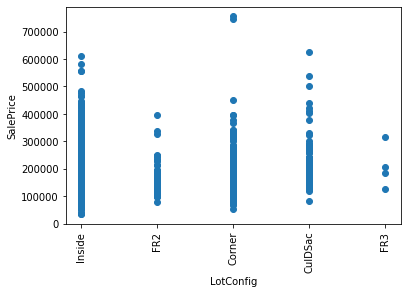

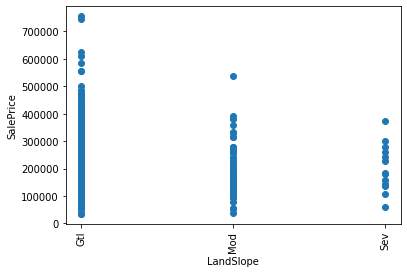

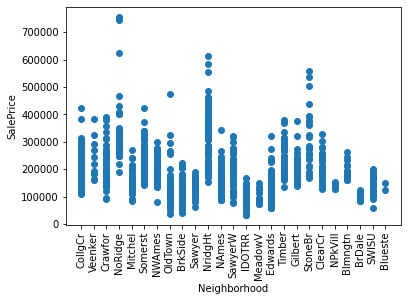

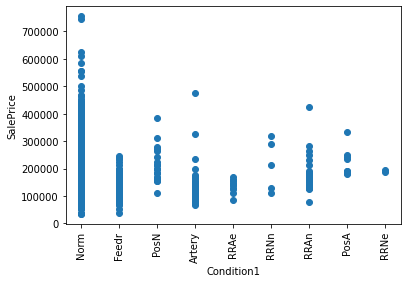

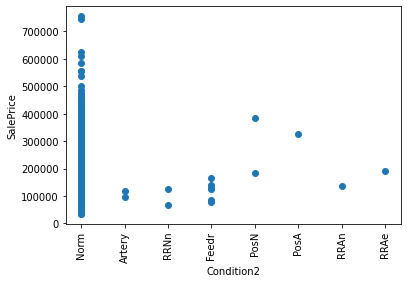

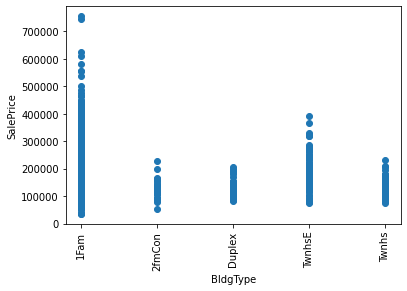

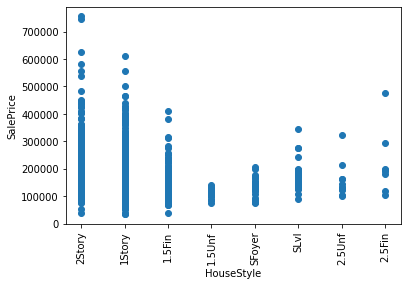

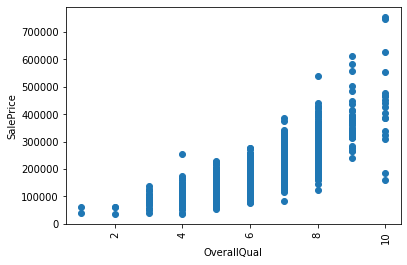

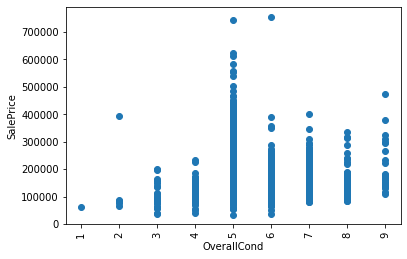

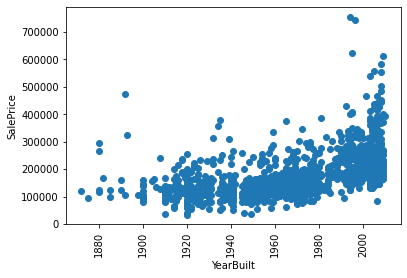

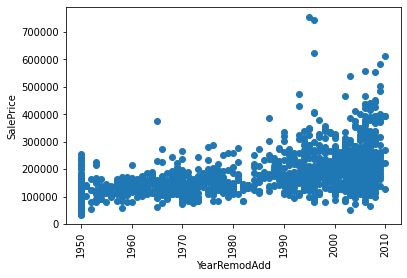

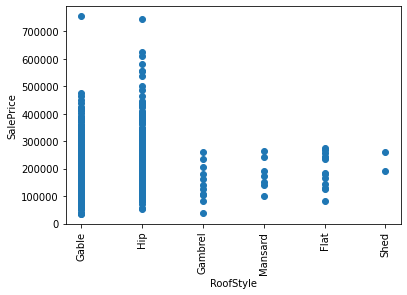

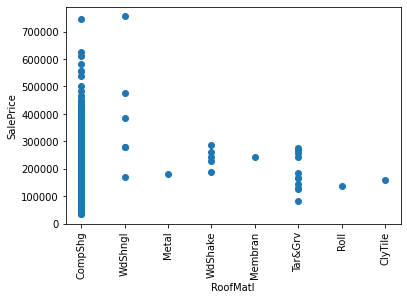

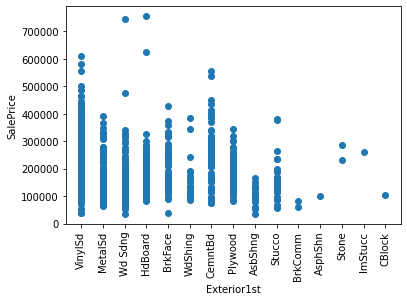

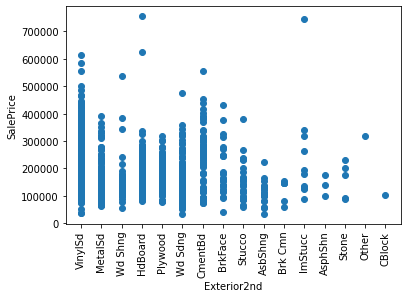

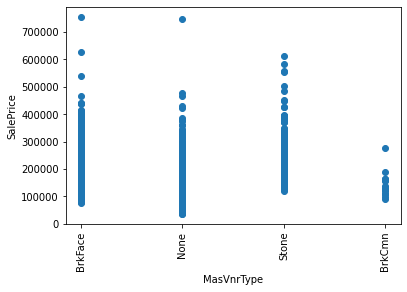

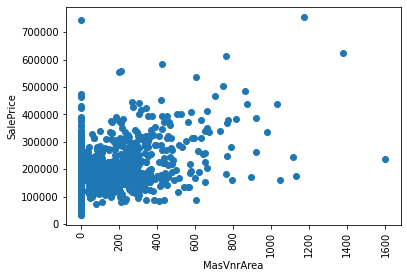

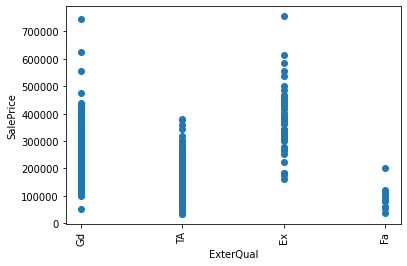

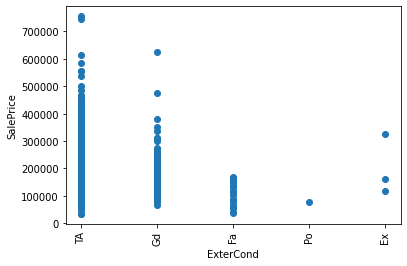

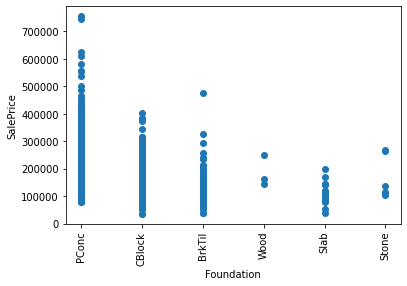

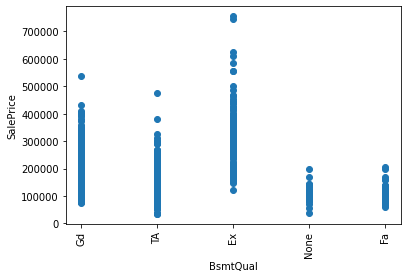

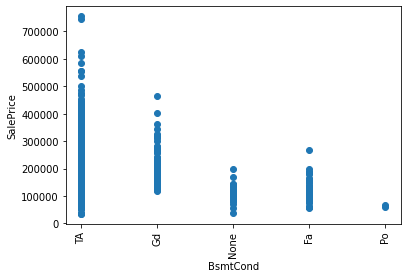

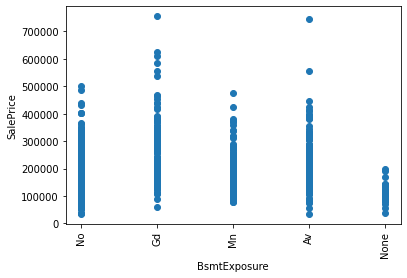

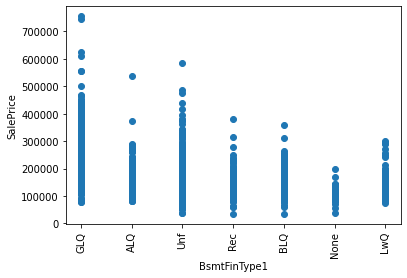

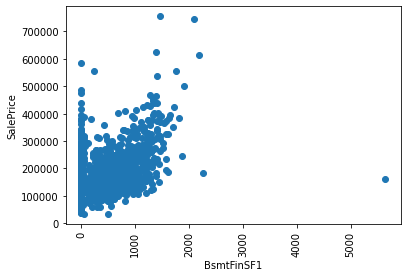

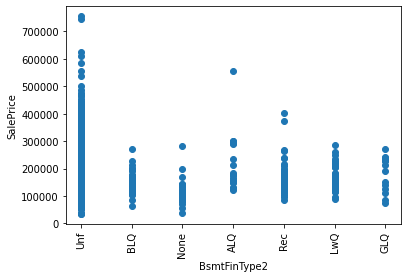

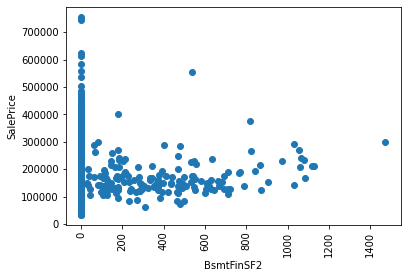

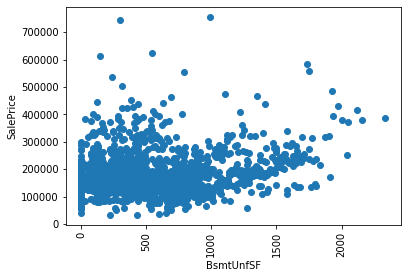

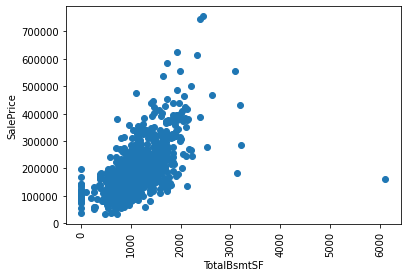

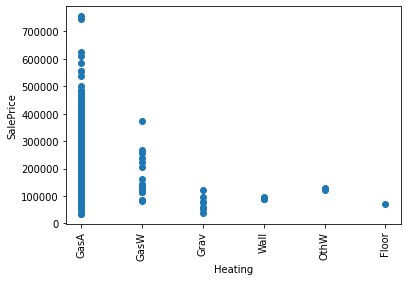

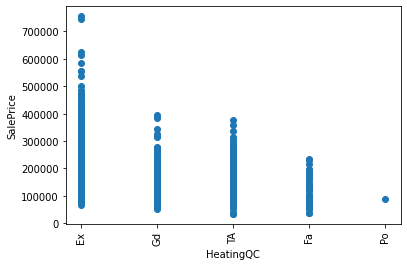

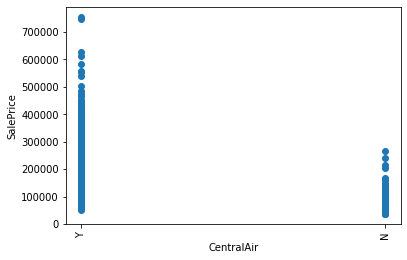

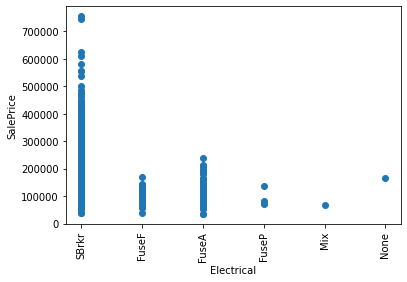

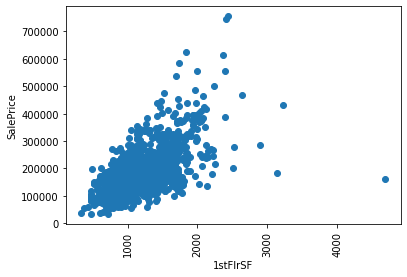

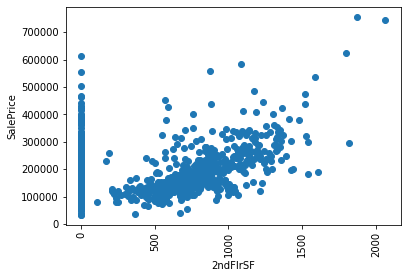

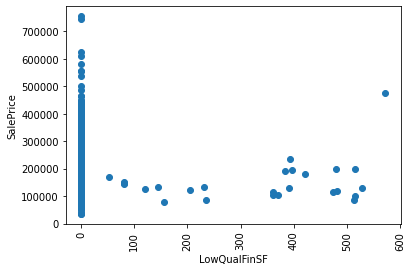

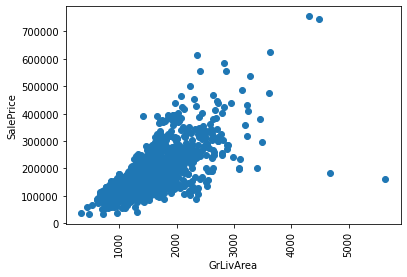

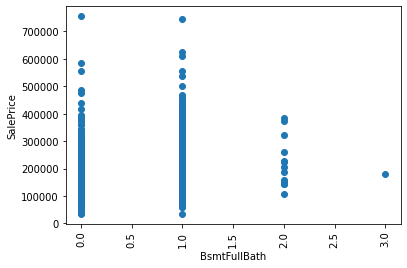

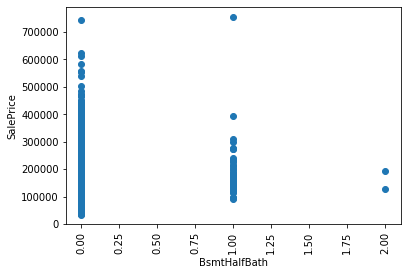

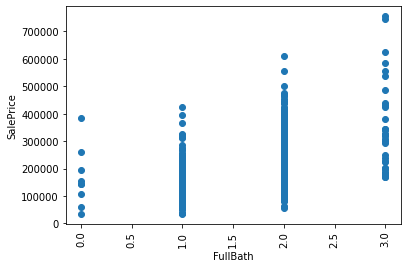

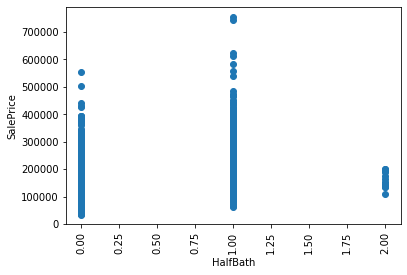

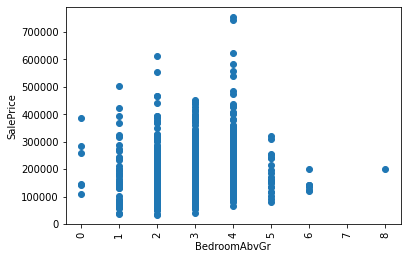

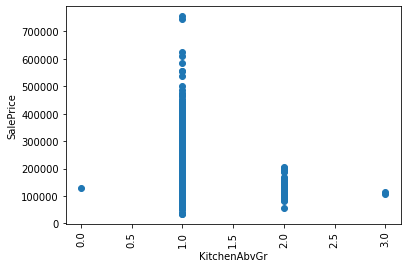

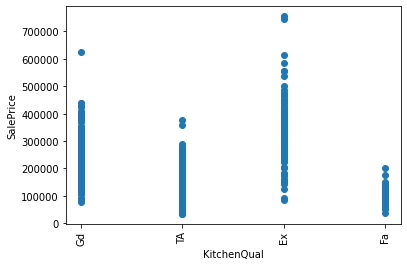

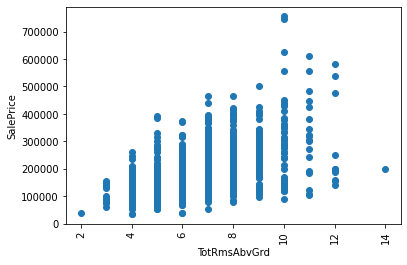

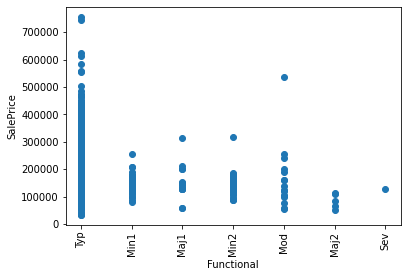

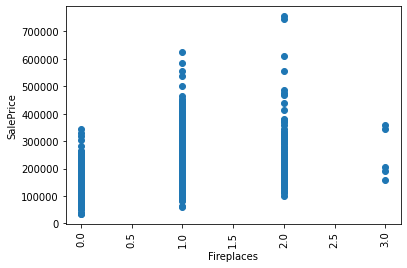

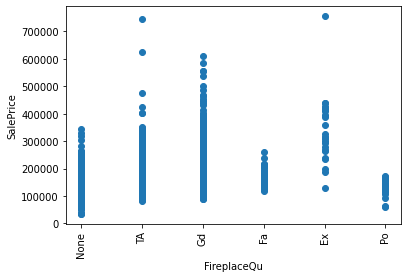

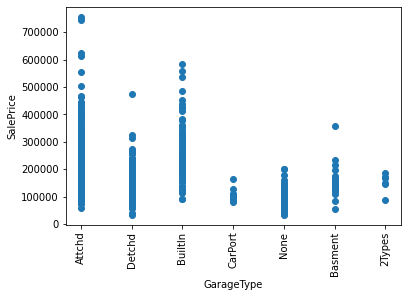

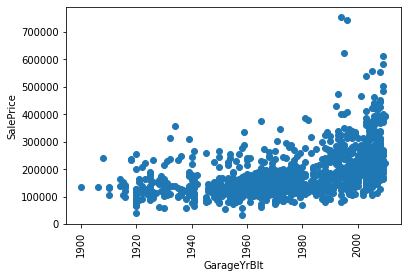

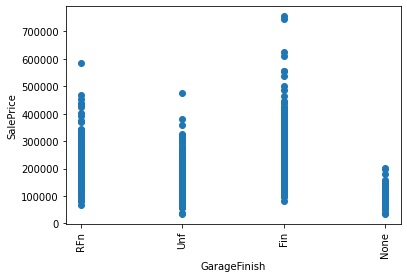

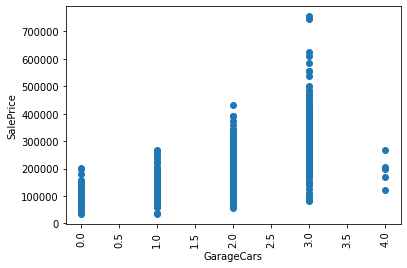

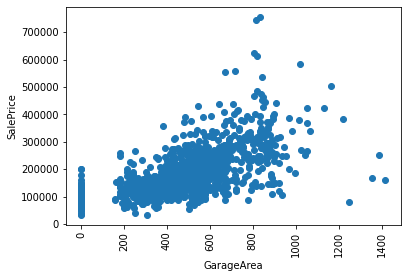

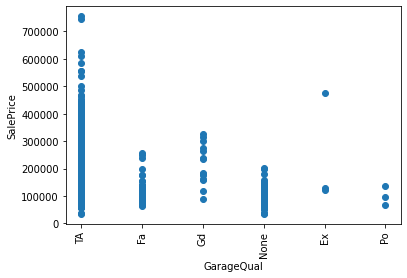

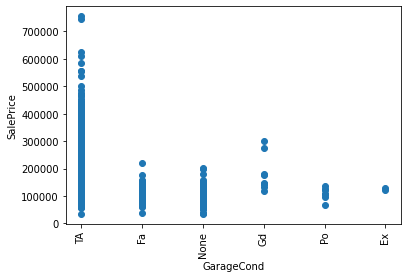

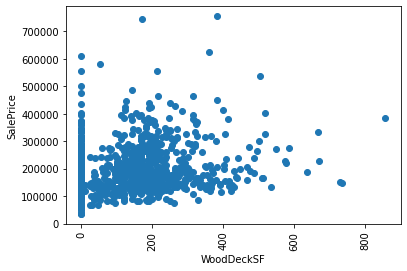

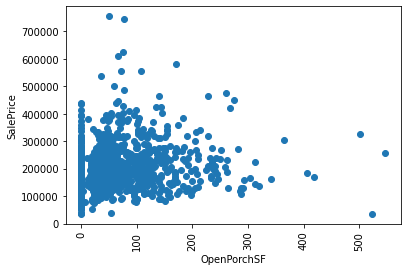

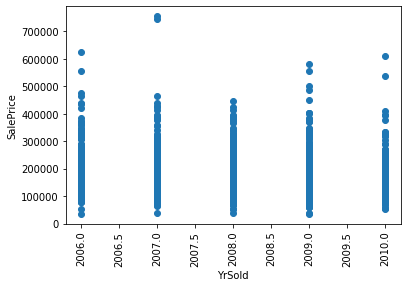

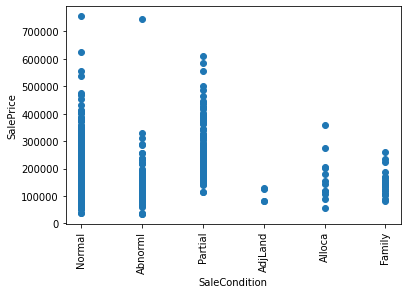

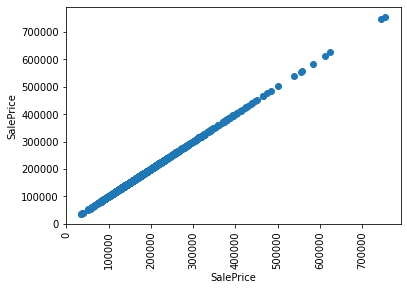

In [626]:
plt.figure()
for col in range(1, houseDf.shape[1]):
    plt.scatter(houseDf.iloc[:, col],houseDf["SalePrice"])
    plt.xlabel(houseDf.columns[col])
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)
    plt.show()
    

In [58]:
houseDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,2010.000000,755000.000000


In [677]:
import numpy as np
houseDf.describe(include=[np.object])

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,6,7,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,PConc,Attchd,Normal
freq,1151,925,1311,1052,1382,225,1260,1220,726,1141,515,504,872,647,870,1198


From above  we can drop columns who have highly skewed data ( one val => Frequency is very high .)
Dropping off cols whose single val frequney is over 90%.


Street
Utilities
Condition2
Roofmatl
Heating
Central Air
Electrical
Functional

In [660]:
dropCols = ['Street','Utilities','RoofMatl','Condition2','Heating','Electrical','Functional','CentralAir']
# dropCols = ['GarageYrBlt']
houseDf.drop(columns = dropCols,axis =1 , inplace = True)


In [664]:
# Columns after deletion of the cols categorical
houseDf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [662]:
houseDf.describe(include=[np.object])


,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,4,5,6,5,5,5,7,7,5,4,6,7,4,6,6,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,Ex,TA,None,Attchd,Unf,TA,TA,Normal
freq,1151,925,1311,1052,1382,225,1260,1220,726,1141,515,504,872,906,1282,647,649,1311,953,430,1256,741,735,690,870,605,1311,1326,1198


### Heat map to understand the correlation of the continuous variables . 

In [ ]:
the corr value of >+/-0.5  with the Predicted val can be considered.  lesser corr would mean that they have less impact on the predicted variable. 


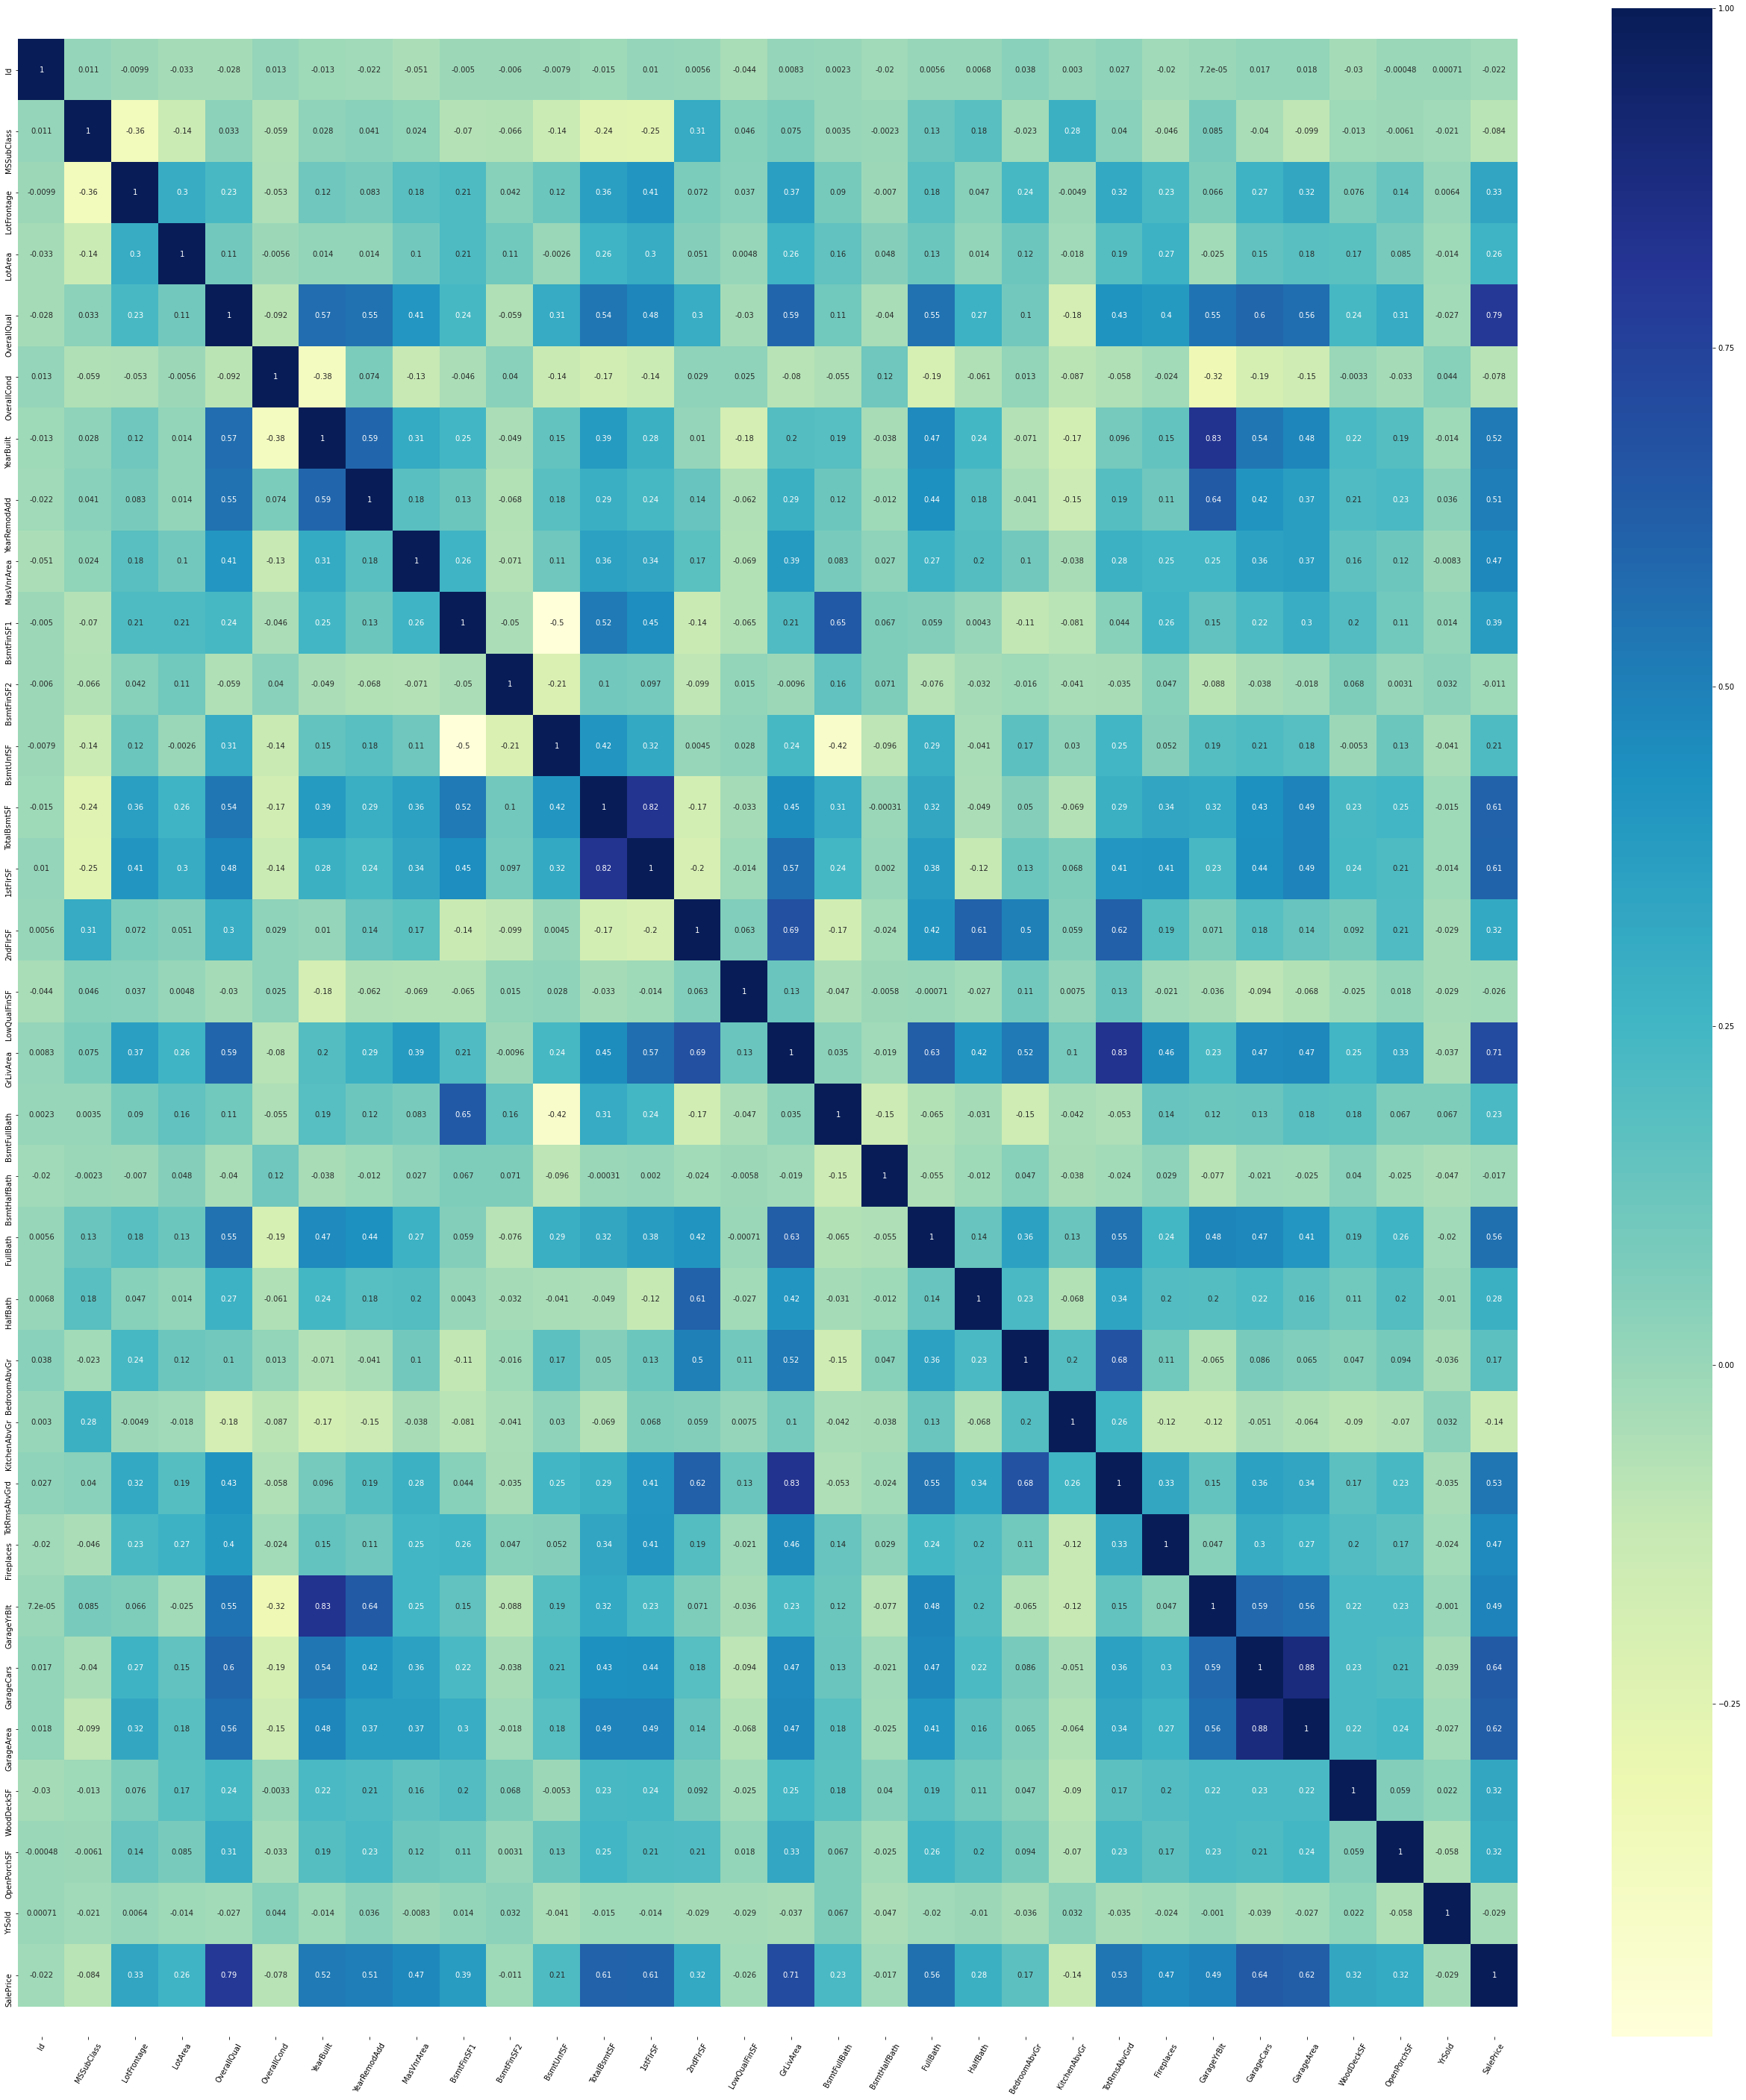

In [665]:


columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleCondition', 'SalePrice']
df = houseDf[columns]
plt.figure(figsize = (45, 50))
plt.xticks(rotation=60)

# ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
# top, bottom = ax.get_ylim()
# ax.set_ylim(top+0.5, bottom-0.5)
ax= sns.heatmap(df.corr(), annot = True, cmap="YlGnBu" )
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

### Observation from heat map : 

based on the heat map the following column can be dropped:
Garage Cars and Garage Area are highly correlated: Col Garage Cars- drop


In [666]:
houseDf.drop('GarageCars', axis = 1, inplace = True)
houseDf.drop('GarageYrBlt', axis = 1, inplace = True)


In [75]:
houseDf.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.00000,1460.000000,1460,1460.000000,1460.000000,1422.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,4,4,5,3,25,9,5,8,NaN,NaN,NaN,NaN,6,15,16,4,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,RL,NaN,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,VinylSd,VinylSd,None,NaN,NaN,NaN,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attchd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,925,1311,1052,1382,225,1260,1220,726,NaN,NaN,NaN,NaN,1141,515,504,872,NaN,NaN,NaN,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,103.117123,3.39589,3.083562,NaN,3.489041,2.934932,1.673699,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,0.613014,1.825342,NaN,1.715753,472.980137,2.810274,2.808904,94.244521,46.660274,2007.815753,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,180.731373,0.57428,0.351054,NaN,0.876478,0.552159,1.047297,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.644666,1.810877,NaN,0.892831,213.804841,0.722898,0.719685,125.338794,66.256028,1.328095,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,0.000000,2.00000,1.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,NaN,34900.000000
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,NaN,NaN,NaN,0.000000,3.00000,3.000000,NaN,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,NaN,1.000000,334.500000,3.000000,3.000000,0.000000,0.000000,2007.000000,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN

In [632]:
houseDf.describe(include=[np.object])

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,4,5,6,5,5,5,7,7,5,4,6,7,4,6,6,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,Ex,TA,None,Attchd,Unf,TA,TA,Normal
freq,1151,925,1311,1052,1382,225,1260,1220,726,1141,515,504,872,906,1282,647,649,1311,953,430,1256,741,735,690,870,605,1311,1326,1198


In [667]:

colu= ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']

gradeDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

finishDict = {'Fin':3,'RFn':2, 'Unf':1, 'None':0}   
bsmtfinish = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0}

expo = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}


In [668]:

houseDf['ExterQual']=houseDf.ExterQual.map(gradeDict)
houseDf['ExterCond']=houseDf.ExterCond.map(gradeDict)
houseDf['BsmtQual']=houseDf.BsmtQual.map(gradeDict)
houseDf['BsmtCond']=houseDf.BsmtCond.map(gradeDict) 
houseDf['HeatingQC']=houseDf.HeatingQC.map(gradeDict)
houseDf['KitchenQual']=houseDf.KitchenQual.map(gradeDict)
houseDf['FireplaceQu']=houseDf.FireplaceQu.map(gradeDict) 
houseDf['GarageQual']=houseDf.GarageQual.map(gradeDict)
houseDf['GarageCond']=houseDf.GarageCond.map(gradeDict)


    

In [669]:
houseDf['BsmtExposure']=houseDf.BsmtExposure.map(expo)

In [670]:
houseDf['BsmtFinType1'] = houseDf.BsmtFinType1.map(bsmtfinish)

In [671]:
houseDf['BsmtFinType2']= houseDf.BsmtFinType2.map(bsmtfinish)

In [672]:
houseDf['GarageFinish']= houseDf.GarageFinish.map(finishDict)

In [673]:
houseDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1422.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,3.083562,3.489041,2.934932,1.673699,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,0.613014,1.825342,1.715753,472.980137,2.810274,2.808904,94.244521,46.660274,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,0.876478,0.552159,1.047297,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.644666,1.810877,0.892831,213.804841,0.722898,0.719685,125.338794,66.256028,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,334.500000,3.000000,3.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,2.000000,480.000000,3.000000,3.000000,0.000000,25.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,4.000000,3.000000,2.000000,6.000000,712.250000,1.000000,0.000000,808.000000,1298.250000,5.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2.000000,576.000000,3.000000,3.000000,168.000000,68.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,5.000000,4.000000,4.000000,6.000000,5644.000000,6.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,3.000000,1418.000000,5.000000,5.000000,857.000000,547.000000,2010.000000,755000.000000


In [78]:
import numpy as np 
houseDf.describe(include=[np.object])

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,6,7,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,PConc,Attchd,Normal
freq,1151,925,1311,1052,1382,225,1260,1220,726,1141,515,504,872,647,870,1198


In [ ]:
Dummy Code: LandSlope 
    

 ### Binary Encoder:
 Below listed Cols will be binary Coded
MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,	RoofStyle ,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,GarageType 	GarageFinish,SaleCondition
 

In [674]:

columns = ['MSZoning','LotShape','LandContour','LotConfig', 'Neighborhood','BldgType','Condition1','HouseStyle','RoofStyle','Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation','GarageType','SaleCondition']

for i in columns: 
    ce_binary = ce.BinaryEncoder(cols = [i])
    df1 = ce_binary.fit_transform(houseDf[i])
    houseDf = pd.concat([houseDf, df1],axis = 1)

In [675]:
houseDf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1.0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2,548,3,3,0,61,2008,Normal,208500,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4.0,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,2,460,3,3,298,0,2007,Normal,181500,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2.0,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2,608,3,3,0,42,2008,Normal,223500,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1.0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1,642,3,3,0,35,2006,Abnorml,140000,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3.0,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2,836,3,3,192,84,2008,Normal,250000,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1.0,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,3,Attchd,2,460,3,3,0,40,2007,Normal,175000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,

In [676]:
houseDf.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure       38
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQua

In [678]:
# LandSlope: dummy

house_dummies = pd.get_dummies(houseDf['LandSlope'], drop_first=True)
house_dummies.head()
    

,Mod,Sev
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [680]:
houseDf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1.0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2,548,3,3,0,61,2008,Normal,208500,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4.0,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,2,460,3,3,298,0,2007,Normal,181500,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2.0,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2,608,3,3,0,42,2008,Normal,223500,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1.0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1,642,3,3,0,35,2006,Abnorml,140000,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3.0,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2,836,3,3,192,84,2008,Normal,250000,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1.0,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,3,Attchd,2,460,3,3,0,40,2007,Normal,175000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,

In [84]:
 houseDf = pd.concat([houseDf, house_dummies],axis = 1)

In [681]:
# Drop val : 
Coltodrop = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','GarageType','GarageFinish','SaleCondition','LandSlope']

In [47]:
houseDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,AgeOfConst,RemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,0.0,0.0,0.0,0.0,1422.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,0.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,0.0,1460.000000,1460.000000,0.0,1460.000000,1460.000000,0.0,0.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,NaN,NaN,NaN,NaN,1.673699,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,0.613014,NaN,1.715753,472.980137,NaN,NaN,94.244521,46.660274,2007.815753,180921.195890,0.0,0.055479,0.156164,0.806164,0.006849,0.359589,0.661644,0.034247,0.067808,0.922603,0.0,0.067123,0.212329,0.903425,0.0,0.232192,0.470548,0.450000,0.385616,0.427397,0.0,0.107534,0.056849,0.900685,0.0,0.006849,0.061644,0.089726,0.902740,0.005479,0.086986,0.654795,0.443151,0.0,0.015068,0.204795,0.797945,0.0,0.109589,0.249315,0.371233,0.586986,0.000685,0.066438,0.428082,0.371233,0.534932,0.010274,0.684932,0.392466,0.0,0.022603,0.538356,0.559589,0.0,0.078767,0.342466,0.715753,0.0,0.024658,0.168493,0.914384,36.547945,22.950000
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,NaN,NaN,NaN,NaN,1.047297,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,0.644666,NaN,0.892831,213.804841,NaN,NaN,125.338794,66.256028,1.328095,79442.502883,0.0,0.228992,0.363135,0.395437,0.082505,0.480044,0.473312,0.181924,0.251503,0.267312,0.0,0.250321,0.409096,0.295480,0.0,0.422375,0.499303,0.497664,0.486907,0.494870,0.0,0.309897,0.231634,0.299187,0.0,0.082505,0.240590,0.285887,0.296413,0.073846,0.281912,0.475598,0.496928,0.0,0.121867,0.403690,0.401670,0.0,0.312484,0.4

In [590]:
houseDf.describe(include=[np.object])


,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,6,7,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,PConc,Attchd,Normal
freq,1151,925,1311,1052,1382,225,1260,1220,726,1141,515,504,872,647,870,1198


In [682]:
for i in Coltodrop:
    houseDf.drop(i, axis = 1 , inplace = True)

In [684]:
# Adding ConstAge : how many years before was it Constructed
# Adding RemodelAge: How many years before was it Remodelled

houseDf['AgeOfConst']=houseDf['YrSold'].sub(houseDf['YearBuilt'],axis=0)

In [685]:
houseDf['RemodelAge']= houseDf['YrSold'].sub(houseDf['YearRemodAdd'],axis=0)

In [686]:
 houseDf.drop('YearBuilt', axis =1, inplace = True)

In [687]:
houseDf.drop('YearRemodAdd', axis=1, inplace= True)

In [92]:
houseDf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,Mod,Sev,AgeOfConst,RemodelAge
0,1,60,65.0,8450,7,5,196.0,4,3,4,3,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,548,3,3,0,61,2008,208500,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,5,5
1,2,20,80.0,9600,6,8,0.0,3,3,4,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,460,3,3,298,0,2007,181500,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,31,31
2,3,60,68.0,11250,7,5,162.0,4,3,4,3,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,608,3,3,0,42,2008,223500,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,7,6
3,4,70,60.0,9550,7,5,0.0,3,3,3,4,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,642,3,3,0,35,2006,140000,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,91,36
4,5,60,84.0,14260,8,5,350.0,4,3,4,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,836,3,3,192,84,2008,250000,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,3,3,4,3,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,3,460,3,3,0,40,2007,175000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,8,7
1456,1457,20,85.0,13175,6,6,119.0,3,3,4,3,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,2,3,500,3,3,349,0,2010,210000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,32,22
1457,1458,70,66.0,9042,7,9,0.0,5,4,3,4,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,2,4,252,3,3,0,60,2010,266500,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,69,4
1458,1459,20,68.0,9717,5,6,0.0,3,3,3,3,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,0,0,240,3,3,366,0,2010,142125,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,60,14


In [98]:
houseDf.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
MasVnrArea         0
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtCond           0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageArea         0
GarageQual         0
GarageCond         0
WoodDeckSF         0
OpenPorchSF        0
YrSold             0
SalePrice          0
MSZoning_0         0
MSZoning_1         0
MSZoning_2         0
MSZoning_3         0
LotShape_0         0
LotShape_1         0
LotShape_2         0
LandContour_0      0
LandContour_1

In [ ]:
The Predictor varaible is skewed to the right , indicating the outliers are at the high sale prices.
In order to get the normal distribution of the Predictor variable to be able to carry out the Advanced Regression we shall use the transformations to normalise the distribution. 
This is done instead of deleteing the outliers , so as to have a model that is trained to be able  to predict at high Value Sale prices as well. 

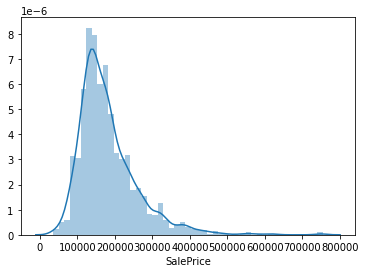

In [688]:
sns.distplot(houseDf.SalePrice)

In [689]:
houseDf['SalePrice'].skew()

1.8828757597682129

#### Transforming the Target Variable SalePrice to remove the Skewness.

In [690]:
#log transformation
# This also transforms the price variable column.so we have a transformed Price Col
import numpy as np 
houseDf['SalePrice']= np.log(houseDf['SalePrice'])
houseDf['SalePrice'].skew()


0.12133506220520406

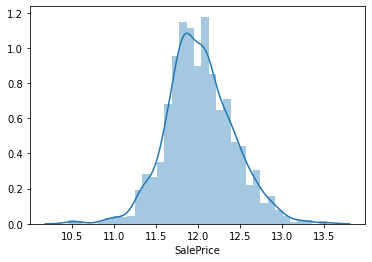

In [102]:
sns.distplot(houseDf.SalePrice)

In [632]:
houseDf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,LotShape_0,LotShape_1,LotShape_2,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,LandSlope_Mod,LandSlope_Sev,BldgType_0,BldgType_1,BldgType_2,BldgType_3,AgeOfConst,RemodelAge
0,1,60,65.0,8450,7,5,196.0,4,3,4,3,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,548,3,3,0,61,2008,12.247694,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,5,5
1,2,20,80.0,9600,6,8,0.0,3,3,4,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,460,3,3,298,0,2007,12.109011,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,31,31
2,3,60,68.0,11250,7,5,162.0,4,3,4,3,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,608,3,3,0,42,2008,12.317167,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,7,6
3,4,70,60.0,9550,7,5,0.0,3,3,3,4,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,642,3,3,0,35,2006,11.849398,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,91,36
4,5,60,84.0,14260,8,5,350.0,4,3,4,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,836,3,3,192,84,2008,12.429216,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,3,3,4,3,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,3,460,3,3,0,40,2007,12.072541,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,8,7
1456,1457,20,85.0,13175,6,6,119.0,3,3,4,3,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,2,3,500,3,3,349,0,2010,12.254863,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,32,22
1457,1458,70,66.0,9042,7,9,0.0,5,4,3,4,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,2,4,252,3,3,0,60,2010,12.493130,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,69,4
1458,1459,20,68.0,9717,5,6,0.0,3,3,3,3,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,0,0,240,3,3,366,0,2010,11.864462,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,60,14


### First Cut Approach

###  Step 1: Just  Train the Model 

In [691]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#y = target variable 
y = houseDf.loc[:,'SalePrice']
X =houseDf.drop(['SalePrice'],axis=1)



#Split Test train 
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3 , random_state = 100)




In [692]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [108]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,Mod,Sev,AgeOfConst,RemodelAge
0,1,60,65.0,8450,7,5,196.0,4,3,4,3,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,548,3,3,0,61,2008,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,5,5
1,2,20,80.0,9600,6,8,0.0,3,3,4,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,460,3,3,298,0,2007,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,31,31
2,3,60,68.0,11250,7,5,162.0,4,3,4,3,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,608,3,3,0,42,2008,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,7,6
3,4,70,60.0,9550,7,5,0.0,3,3,3,4,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,642,3,3,0,35,2006,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,91,36
4,5,60,84.0,14260,8,5,350.0,4,3,4,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,836,3,3,192,84,2008,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,3,3,4,3,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,3,460,3,3,0,40,2007,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,8,7
1456,1457,20,85.0,13175,6,6,119.0,3,3,4,3,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,2,3,500,3,3,349,0,2010,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,32,22
1457,1458,70,66.0,9042,7,9,0.0,5,4,3,4,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,2,4,252,3,3,0,60,2010,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,69,4
1458,1459,20,68.0,9717,5,6,0.0,3,3,3,3,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,0,0,240,3,3,366,0,2010,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,60,14


In [693]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,AgeOfConst,RemodelAge
210,211,30,67.0,5604,5,6,0.0,3,3,3,3,3,468,1,0,396,864,3,864,0,0,864,1,0,1,0,2,1,3,5,0,0,0,0,0,0,0,2008,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,83,58
318,319,60,90.0,9900,7,5,256.0,4,3,4,3,6,987,1,0,360,1347,5,1372,1274,0,2646,1,0,2,1,4,1,4,9,1,3,656,3,3,340,60,2009,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,16,16
239,240,50,52.0,8741,6,4,0.0,3,3,3,2,2,94,1,0,641,735,3,798,689,0,1487,0,0,1,1,3,1,3,7,1,4,220,3,3,0,140,2010,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,65,60
986,987,50,59.0,5310,6,8,0.0,3,4,3,2,1,0,1,0,485,485,4,1001,634,0,1635,0,0,1,0,2,1,4,5,0,0,255,2,3,394,0,2006,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,96,3
1416,1417,190,60.0,11340,4,6,0.0,3,3,3,3,1,0,1,0,777,777,4,1246,1044,0,2290,0,0,2,0,4,2,3,11,0,0,560,3,3,0,0,2010,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,125,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,60,63.0,8199,7,5,0.0,4,3,4,3,6,648,1,0,80,728,5,728,728,0,1456,1,0,2,1,3,1,4,7,1,4,410,3,3,36,18,2008,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,3,3
53,54,20,68.0,50271,9,5,0.0,4,3,5,3,6,1810,1,0,32,1842,4,1842,0,0,1842,2,0,0,1,0,1,4,5,1,4,894,3,3,857,72,2006,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,25,19
350,351,120,68.0,7820,9,5,362.0,5,3,5,3,1,0,1,0,1869,1869,5,1869,0,0,1869,0,0,2,0,2,1,5,6,1,4,617,3,3,210,54,2007,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0
79,80,50,60.0,10440,5,6,0.0,3,3,3,3,1,0,1,0,440,440,4,682,548,0,1230,0,0,1,1,2,1,3,5,0,0,440,3,3,74,0,2009,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,99,28


In [109]:
y_train

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
802     12.149502
53      12.860999
350     12.669998
79      11.608236
792     12.505399
Name: SalePrice, Length: 1022, dtype: float64

In [110]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,Mod,Sev,AgeOfConst,RemodelAge
1436,1437,20,60.0,9000,4,6,0.0,3,3,3,3,5,616,1,0,248,864,3,864,0,0,864,0,0,1,0,3,1,3,5,0,0,528,3,3,0,0,2007,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,36,36
57,58,60,89.0,11645,7,5,0.0,4,3,4,3,1,0,1,0,860,860,5,860,860,0,1720,0,0,2,1,3,1,4,7,0,0,565,3,3,0,70,2006,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,2,2
780,781,20,63.0,7875,7,5,38.0,3,3,4,4,1,0,1,0,1237,1237,4,1253,0,0,1253,0,0,2,0,3,1,3,6,1,3,402,3,3,220,21,2007,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,12,11
382,383,60,79.0,9245,7,5,0.0,4,3,4,3,1,0,1,0,939,939,5,939,858,0,1797,0,0,2,1,3,1,4,8,0,0,639,3,3,144,53,2007,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
1170,1171,80,76.0,9880,6,6,0.0,3,3,3,3,5,522,1,0,574,1096,3,1118,0,0,1118,1,0,1,0,3,1,3,6,1,1,358,3,3,203,0,2008,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,20,80.0,9600,5,6,132.0,3,3,3,3,5,991,1,0,50,1041,5,1041,0,0,1041,1,0,1,0,3,1,3,6,0,0,270,3,3,224,88,2009,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,50,50
555,556,45,58.0,6380,5,6,0.0,3,3,3,2,1,0,1,0,993,993,3,1048,0,0,1048,0,0,1,0,2,1,3,5,1,4,280,3,3,0,0,2006,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,84,56
399,400,60,65.0,8125,7,5,100.0,4,3,4,3,6,812,1,0,280,1092,5,1112,438,0,1550,1,0,2,0,2,1,4,7,0,0,438,3,3,0,168,2009,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,3,2
545,546,50,69.0,13837,7,5,178.0,4,4,4,4,6,1002,2,202,0,1204,4,1377,806,0,2183,0,0,2,1,4,1,4,9,0,0,786,3,3,0,0,2006,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,18,18


In [111]:
y_test

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
          ...    
509     11.732061
555     11.635143
399     12.392552
545     12.341477
266     12.128111
Name: SalePrice, Length: 438, dtype: float64

Scaling : After train - test split so that the test data are not scaled based on the train data .. which would make it not an accurate prediction when model predicts . 
The test data should not be influenced by the train data ;)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()


In [114]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,Mod,Sev,AgeOfConst,RemodelAge
0,-1.235594,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,-0.557667,-0.699254,-0.260680,-0.532966,0.123878,-0.280632,0.042644,-0.278347,-0.293157,-0.373789,-0.431237,-1.180063,-0.765334,-0.788604,-0.12444,-1.229044,1.065748,-0.247663,-1.027046,-0.752739,-1.043384,-0.234034,-0.775454,-0.936623,-0.926310,-0.984405,-2.218789,-3.869188,-3.862126,-0.744032,-0.710376,0.135294,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.745356,0.710742,-0.188311,-0.275299,0.287449,0.0,-0.269078,-0.534354,0.323828,0.0,1.830010,-0.948487,-0.917301,-0.777429,-0.840343,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,0.724826,-0.894033,0.0,-0.126113,-0.485584,0.490195,0.0,2.767854,-0.569064,1.265112,-1.131923,-0.031296,3.775411,-0.845438,-0.788811,0.957835,-0.099405,0.673624,-0.806877,0.0,-0.151733,0.944771,-1.140965,0.0,3.431472,-0.729544,0.635489,0.0,-0.158352,-0.441952,0.310752,-0.217097,-0.099405,1.530646,1.705212
1,-0.981223,0.035958,0.925887,-0.056819,0.649199,-0.532671,0.809956,1.052308,-0.260680,0.578649,0.123878,1.139200,1.159589,-0.278347,-0.293157,-0.454087,0.621761,0.872745,0.512263,2.138751,-0.12444,2.122327,1.065748,-0.247663,0.785806,1.245441,1.396750,-0.234034,0.742772,1.556160,0.623099,0.659487,0.868004,0.270006,0.272399,1.989285,0.196695,0.882702,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.745356,0.710742,-0.188311,3.632416,0.287449,0.0,-0.269078,-0.534354,0.323828,0.0,-0.546445,-0.948487,1.090154,-0.777429,-0.840343,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,-1.379641,1.118526,0.0,-0.126113,-0.485584,0.490195,0.0,-0.361291,1.757271,-0.790444,-1.131923,-0.031296,-0.264872,1.182819,-0.788811,-1.044021,-0.099405,-1.484507,1.239347,0.0,-0.151733,-1.058457,0.876451,0.0,-0.291420,-0.729544,0.635489,0.0,-0.158352,-0.441952,0.310752,4.606234,-0.099405,-0.676845,-0.333405
2,-1.167290,-0.195170,-0.795980,-0.169353,-0.065759,-1.449151,-0.557667,-0.699254,-0.260680,-0.532966,-1.610416,-0.753910,-0.762245,-0.278347,-0.293157,0.172682,-0.712473,-1.180063,-0.931321,0.794557,-0.12444,-0.057381,-0.838438,-0.247663,-1.027046,1.245441,0.176683,-0.234034,-0.775454,0.309769,0.623099,1.207451,-1.183584,0.270006,0.272399,-0.744032,1.406122,1.630110,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.745356,0.710742,-0.188311,-0.275299,0.287449,0.0,-0.269078,-0.534354,0.323828,0.0,1.830010,-0.948487,-0.917301,-0.777429,-0.840343,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,0.724826,1.118526,0.0,-0.126113,-0.485584,0.490195,0.0,-0.361291,-0.569064,-0.790444,0.883452,-0.031296,-0.264872,-0.845438,-0.788811,0.957835,-0.099405,0.673624,-0.806877,0.0,-0.151733,0.944771,-1.140965,0.0,-0.

In [115]:
X_test=pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,Foundation_2,Foundation_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,Mod,Sev,AgeOfConst,RemodelAge
0,1.651992,-0.888556,-0.433482,-0.144205,-1.495676,0.383810,-0.557667,-0.699254,-0.26068,-0.532966,0.123878,0.665923,0.361157,-0.278347,-0.293157,-0.703903,-0.431237,-1.180063,-0.765334,-0.788604,-0.12444,-1.229044,-0.838438,-0.247663,-1.027046,-0.752739,0.176683,-0.234034,-0.775454,-0.936623,-0.926310,-0.984405,0.265703,0.270006,0.272399,-0.744032,-0.710376,-0.612114,0.0,-0.245288,-0.432426,0.49173,-0.094258,-0.745356,0.710742,-0.188311,-0.275299,0.287449,0.0,-0.269078,1.871417,-3.088055,0.0,-0.546445,1.054310,1.090154,-0.777429,-0.840343,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,0.724826,-0.894033,0.0,-0.126113,-0.485584,0.490195,0.0,-0.361291,1.757271,-0.790444,-1.131923,-0.031296,-0.264872,1.182819,-0.788811,-1.044021,-0.099405,0.673624,-0.806877,0.0,-0.151733,-1.058457,0.876451,0.0,-0.29142,1.370720,-1.573592,0.0,-0.158352,-0.441952,0.310752,-0.217097,-0.099405,-0.017892,0.637365
1,-1.595953,0.035958,0.880575,0.112613,0.649199,-0.532671,-0.557667,1.052308,-0.26068,0.578649,0.123878,-1.227188,-0.964543,-0.278347,-0.293157,0.661161,-0.439958,0.872745,-0.775394,1.187475,-0.12444,0.380817,-0.838438,-0.247663,0.785806,1.245441,0.176683,-0.234034,0.742772,0.309769,-0.926310,-0.984405,0.439806,0.270006,0.272399,-0.744032,0.347873,-1.359522,0.0,-0.245288,-0.432426,0.49173,-0.094258,1.341641,-1.406980,-0.188311,-0.275299,0.287449,0.0,-0.269078,1.871417,0.323828,0.0,-0.546445,-0.948487,-0.917301,-0.777429,1.189990,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,-1.379641,1.118526,0.0,-0.126113,-0.485584,0.490195,0.0,-0.361291,-0.569064,-0.790444,0.883452,-0.031296,-0.264872,-0.845438,-0.788811,0.957835,-0.099405,0.673624,-0.806877,0.0,-0.151733,-1.058457,0.876451,0.0,-0.29142,-0.729544,0.635489,0.0,-0.158352,-0.441952,0.310752,-0.217097,-0.099405,-1.138112,-1.012945
2,0.106921,-0.888556,-0.297545,-0.253438,0.649199,-0.532671,-0.354660,-0.699254,-0.26068,0.578649,1.858173,-1.227188,-0.964543,-0.278347,-0.293157,1.502059,0.381948,-0.153659,0.212984,-0.788604,-0.12444,-0.497460,-0.838438,-0.247663,0.785806,-0.752739,0.176683,-0.234034,-0.775454,-0.313427,0.623099,0.659487,-0.327187,0.270006,0.272399,1.024585,-0.392901,-0.612114,0.0,-0.245288,-0.432426,0.49173,-0.094258,-0.745356,0.710742,-0.188311,-0.275299,0.287449,0.0,-0.269078,-0.534354,0.323828,0.0,1.830010,-0.948487,-0.917301,1.286291,-0.840343,0.0,-0.356078,-0.264872,0.336585,0.0,-0.088823,-0.269078,-0.314523,0.338384,-0.062684,-0.320127,0.724826,-0.894033,0.0,-0.126113,-0.485584,0.490195,0.0,-0.361291,1.757271,-0.790444,-1.131923,-0.031296,-0.264872,1.182819,-0.788811,-1.044021,-0.099405,-1.484507,1.239347,0.0,-0.151733,-1.058457,0.876451,0.0,-0.291

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [118]:
 from sklearn.metrics import r2_score
r2_score(y_true=y_train, y_pred=y_train_pred)


0.8917545034678959

In [119]:
r2_score(y_true=y_test,y_pred = y_test_pred)

0.8764940115097772

Feature: 0, Score: -0.04144
Feature: 1, Score: -0.00985
Feature: 2, Score: 0.01672
Feature: 3, Score: 0.09442
Feature: 4, Score: 0.04493
Feature: 5, Score: 0.03379
Feature: 6, Score: 0.02673
Feature: 7, Score: -4583806225.71543
Feature: 8, Score: -0.01129
Feature: 9, Score: -1683806657.52439
Feature: 10, Score: -4422716696.41876
Feature: 11, Score: 4524914590.42196
Feature: 12, Score: 0.01383
Feature: 13, Score: 6046748740.42159
Feature: 14, Score: 6618296308.36517
Feature: 15, Score: 732400066.26531
Feature: 16, Score: -8086066871.04874
Feature: 17, Score: 0.02751
Feature: 18, Score: 0.01909
Feature: 19, Score: 0.01142
Feature: 20, Score: -0.01703
Feature: 21, Score: 0.01676
Feature: 22, Score: 0.03047
Feature: 23, Score: 0.04275
Feature: 24, Score: 0.03572
Feature: 25, Score: -353067.22767
Feature: 26, Score: -0.01268
Feature: 27, Score: -0.07591
Feature: 28, Score: -0.04929
Feature: 29, Score: -0.01515
Feature: 30, Score: 0.04351
Feature: 31, Score: 0.02720
Feature: 32, Score: 0.047

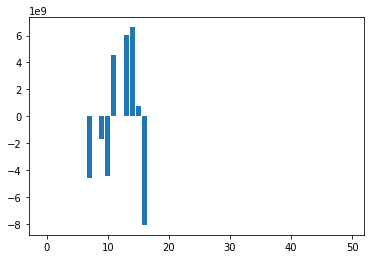

In [175]:
ese are enhancesr not the bread .Yopu know what just settle with RFE .. focus is not here it is in LAsso and RIDGE move out .. th

from matplotlib import pyplot
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### RFE : 
    

In [122]:
lm = LinearRegression()
lm.fit(X_train,y_train)


rfe = RFE(lm , 50)
rfe = rfe.fit(X_train, y_train)

In [123]:
list (zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 35),
 ('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 25),
 ('ExterQual', False, 48),
 ('ExterCond', False, 43),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 36),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 33),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 19),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 23),
 ('FireplaceQu', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', False, 26),
 ('GarageCond', False, 32),
 ('WoodDeckSF', False, 17),
 ('OpenPorchSF', False, 13),
 ('YrSold', False, 

In [129]:
colRFEnot = X_train.columns[~rfe.support_]

In [132]:
colRFESelection = X_train.columns[rfe.support_]

In [181]:
X_train_rfe = X_train[colRFESelection]
X_test_rfe = X_test[colRFESelection]

In [182]:
X_train_rfe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,Neighborhood_0,Neighborhood_1,BldgType_0,BldgType_2,BldgType_3,Condition1_0,Condition1_4,RoofStyle_0,Foundation_2,Foundation_3,GarageType_1,GarageType_3,SaleCondition_3,AgeOfConst,RemodelAge
0,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,-0.532966,-0.280632,0.042644,-0.278347,-0.293157,-0.373789,-0.431237,-1.180063,-0.765334,-0.788604,-0.12444,-1.229044,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,-0.984405,-2.218789,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,3.431472,0.635489,0.310752,1.530646,1.705212
1,0.035958,0.925887,-0.056819,0.649199,-0.532671,0.578649,1.139200,1.159589,-0.278347,-0.293157,-0.454087,0.621761,0.872745,0.512263,2.138751,-0.12444,2.122327,1.065748,0.785806,1.245441,-0.234034,0.742772,1.556160,0.659487,0.868004,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,0.635489,0.310752,-0.676845,-0.333405
2,-0.195170,-0.795980,-0.169353,-0.065759,-1.449151,-0.532966,-0.753910,-0.762245,-0.278347,-0.293157,0.172682,-0.712473,-1.180063,-0.931321,0.794557,-0.12444,-0.057381,-0.838438,-1.027046,1.245441,-0.234034,-0.775454,0.309769,1.207451,-1.183584,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.291420,-1.573592,0.310752,0.937589,1.802289
3,-0.195170,-0.478794,-0.502489,-0.065759,2.216770,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,-0.175275,-1.257503,-0.153659,-0.420785,0.668180,-0.12444,0.220960,-0.838438,-1.027046,-0.752739,-0.234034,0.742772,-0.936623,-0.984405,-1.018892,0.0,-0.245288,2.312537,-2.033637,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,-2.955221,0.0,0.944771,-1.140965,-0.291420,0.635489,0.310752,1.958965,-0.964406
4,3.040630,-0.433482,0.082999,-1.495676,0.383810,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,0.476030,-0.620908,-0.153659,0.195379,1.610264,-0.12444,1.452805,-0.838438,0.785806,-0.752739,4.114745,-0.775454,2.802552,-0.984405,0.416278,0.0,-0.245288,2.312537,-2.033637,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,3.775411,-2.971014,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,-1.573592,0.310752,2.914447,1.802289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.035958,-0.297545,-0.221979,0.649199,-0.532671,0.578649,1.139200,0.430024,-0.278347,-0.293157,-1.078626,-0.727733,0.872745,-1.107368,0.884170,-0.12444,-0.115682,1.065748,0.785806,1.245441,-0.234034,0.742772,0.309769,1.207451,-0.289543,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,0.635489,0.310752,-1.105164,-0.964406
1018,-0.888556,-0.070983,3.863036,2.079115,-0.532671,1.690265,1.139200,2.930776,-0.278347,-0.293157,-1.185690,1.700920,-0.153659,1.694292,-0.788604,-0.12444,0.610260,2.969934,-2.839898,1.245441,-0.234034,0.742772,-0.936623,1.207451,1.987908,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.291420,0.635489,0.310752,-0.380316,-0.187790
1019,1.422730,-0.070983,-0.258778,2.079115,-0.532671,1.690265,-1.22718

In [183]:
X_test_rfe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,Neighborhood_0,Neighborhood_1,BldgType_0,BldgType_2,BldgType_3,Condition1_0,Condition1_4,RoofStyle_0,Foundation_2,Foundation_3,GarageType_1,GarageType_3,SaleCondition_3,AgeOfConst,RemodelAge
0,-0.888556,-0.433482,-0.144205,-1.495676,0.383810,-0.532966,0.665923,0.361157,-0.278347,-0.293157,-0.703903,-0.431237,-1.180063,-0.765334,-0.788604,-0.12444,-1.229044,-0.838438,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,-0.984405,0.265703,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.29142,-1.573592,0.310752,-0.017892,0.637365
1,0.035958,0.880575,0.112613,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,0.661161,-0.439958,0.872745,-0.775394,1.187475,-0.12444,0.380817,-0.838438,0.785806,1.245441,-0.234034,0.742772,0.309769,-0.984405,0.439806,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.29142,0.635489,0.310752,-1.138112,-1.012945
2,-0.888556,-0.297545,-0.253438,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,1.502059,0.381948,-0.153659,0.212984,-0.788604,-0.12444,-0.497460,-0.838438,0.785806,-0.752739,-0.234034,-0.775454,-0.313427,0.659487,-0.327187,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.29142,0.635489,0.310752,-0.808635,-0.576098
3,0.035958,0.427452,-0.120417,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,0.837370,-0.267728,0.872745,-0.576712,1.182880,-0.12444,0.525630,-0.838438,0.785806,1.245441,-0.234034,0.742772,0.932964,-0.984405,0.788011,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.29142,0.635489,0.310752,-1.171059,-1.061483
4,0.498215,0.291515,-0.058761,-0.065759,0.383810,-0.532966,0.665923,0.158858,-0.278347,-0.293157,0.023239,0.074551,-1.180063,-0.126535,-0.788604,-0.12444,-0.751352,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.313427,-0.436441,-0.534228,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.29142,0.635489,0.310752,-0.182630,0.394672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.888556,0.472764,-0.085948,-0.780717,0.383810,-0.532966,0.665923,1.168198,-0.278347,-0.293157,-1.145541,-0.045356,0.872745,-0.320187,-0.788604,-0.12444,-0.896164,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.313427,-0.984405,-0.948310,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.29142,0.635489,0.310752,0.443374,1.316904
434,-0.310734,-0.524106,-0.398596,-0.780717,0.383810,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,0.957817,-0.150002,-1.180063,-0.302582,-0.788604,-0.12444,-0.882999,-0.838438,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,1.207451,-0.901255,0.0,-0.245288,2.312537,-2.033637,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,0.876451,-0.29142,-1.573592,0.310752,1.563594,1.608135
435,0.035958,-0.206920,-0.229164,0.649199,-0.532671,0.578649,1.1

In [438]:
lm1 = LinearRegression()
lm1.fit(X_train1_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [441]:
y_train_pred = lm1.predict(X_train1_rfe)
y_test_pred = lm1.predict(X_test1_rfe)

In [443]:
r2_score(y_true=y_train , y_pred=y_train_pred)

0.879031453473326

In [442]:
r2_score(y_true=y_test,y_pred = y_test_pred)

0.8674290609344026

Looking into the multicollinearity

In [196]:
import statsmodels.api as sm
X_train1_rfe = sm.add_constant(X_train_rfe)
X_train1_rfe

,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,Neighborhood_0,Neighborhood_1,BldgType_0,BldgType_2,BldgType_3,Condition1_0,Condition1_4,RoofStyle_0,Foundation_2,Foundation_3,GarageType_1,GarageType_3,SaleCondition_3,AgeOfConst,RemodelAge
0,1.0,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,-0.532966,-0.280632,0.042644,-0.278347,-0.293157,-0.373789,-0.431237,-1.180063,-0.765334,-0.788604,-0.12444,-1.229044,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,-0.984405,-2.218789,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,3.431472,0.635489,0.310752,1.530646,1.705212
1,1.0,0.035958,0.925887,-0.056819,0.649199,-0.532671,0.578649,1.139200,1.159589,-0.278347,-0.293157,-0.454087,0.621761,0.872745,0.512263,2.138751,-0.12444,2.122327,1.065748,0.785806,1.245441,-0.234034,0.742772,1.556160,0.659487,0.868004,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,0.635489,0.310752,-0.676845,-0.333405
2,1.0,-0.195170,-0.795980,-0.169353,-0.065759,-1.449151,-0.532966,-0.753910,-0.762245,-0.278347,-0.293157,0.172682,-0.712473,-1.180063,-0.931321,0.794557,-0.12444,-0.057381,-0.838438,-1.027046,1.245441,-0.234034,-0.775454,0.309769,1.207451,-1.183584,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.291420,-1.573592,0.310752,0.937589,1.802289
3,1.0,-0.195170,-0.478794,-0.502489,-0.065759,2.216770,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,-0.175275,-1.257503,-0.153659,-0.420785,0.668180,-0.12444,0.220960,-0.838438,-1.027046,-0.752739,-0.234034,0.742772,-0.936623,-0.984405,-1.018892,0.0,-0.245288,2.312537,-2.033637,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,-2.955221,0.0,0.944771,-1.140965,-0.291420,0.635489,0.310752,1.958965,-0.964406
4,1.0,3.040630,-0.433482,0.082999,-1.495676,0.383810,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,0.476030,-0.620908,-0.153659,0.195379,1.610264,-0.12444,1.452805,-0.838438,0.785806,-0.752739,4.114745,-0.775454,2.802552,-0.984405,0.416278,0.0,-0.245288,2.312537,-2.033637,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,3.775411,-2.971014,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,-1.573592,0.310752,2.914447,1.802289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1.0,0.035958,-0.297545,-0.221979,0.649199,-0.532671,0.578649,1.139200,0.430024,-0.278347,-0.293157,-1.078626,-0.727733,0.872745,-1.107368,0.884170,-0.12444,-0.115682,1.065748,0.785806,1.245441,-0.234034,0.742772,0.309769,1.207451,-0.289543,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.058457,0.876451,-0.291420,0.635489,0.310752,-1.105164,-0.964406
1018,1.0,-0.888556,-0.070983,3.863036,2.079115,-0.532671,1.690265,1.139200,2.930776,-0.278347,-0.293157,-1.185690,1.700920,-0.153659,1.694292,-0.788604,-0.12444,0.610260,2.969934,-2.839898,1.245441,-0.234034,0.742772,-0.936623,1.207451,1.987908,0.0,-0.245288,-0.432426,0.491730,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.944771,-1.140965,-0.291420,0.635489,0.310752,-0.380316,-0.187790
1019,1.0,1.422730,-0.070983,-0.2

In [198]:
y_train

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
802     12.149502
53      12.860999
350     12.669998
79      11.608236
792     12.505399
Name: SalePrice, Length: 1022, dtype: float64

#### VIF to remove multicollinearity

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,1stFlrSF,inf
8,BsmtFinSF1,inf
17,GrLivArea,inf
16,LowQualFinSF,inf
15,2ndFlrSF,inf
12,TotalBsmtSF,inf
11,BsmtUnfSF,inf
10,BsmtFinSF2,inf
29,MSZoning_3,11.06
28,MSZoning_2,10.41


In [202]:
#owing to high VIF dropping col 1stFlrSF.

X_train1_rfe.drop('1stFlrSF',axis=1,inplace=True)

In [203]:
vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Some Values have improved VIF dscore but we further need to eleiminate INF valued cols

,Features,VIF
11,BsmtUnfSF,inf
12,TotalBsmtSF,inf
8,BsmtFinSF1,inf
10,BsmtFinSF2,inf
16,GrLivArea,12.13
28,MSZoning_3,11.06
27,MSZoning_2,10.41
14,2ndFlrSF,7.75
43,Foundation_2,6.28
48,AgeOfConst,5.61


In [205]:
#owing to high VIF dropping col BsmtUnfSF

X_train1_rfe.drop('BsmtUnfSF',axis=1,inplace=True)

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,GrLivArea,12.13
27,MSZoning_3,11.06
26,MSZoning_2,10.41
13,2ndFlrSF,7.75
42,Foundation_2,6.28
11,TotalBsmtSF,5.98
47,AgeOfConst,5.61
31,LandContour_2,4.98
43,Foundation_3,4.77
1,MSSubClass,4.04


In [207]:
# Dropping the col above 10 VIF;GrLivArea

X_train1_rfe.drop('GrLivArea',axis=1,inplace=True)

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,MSZoning_3,11.05
25,MSZoning_2,10.41
41,Foundation_2,6.26
46,AgeOfConst,5.53
30,LandContour_2,4.97
42,Foundation_3,4.76
13,2ndFlrSF,4.61
1,MSSubClass,4.04
11,TotalBsmtSF,4.01
36,BldgType_2,3.81


In [209]:
# Dropping the col above 10 VIF;GrLivArea

X_train1_rfe.drop('MSZoning_3',axis=1,inplace=True)



In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
40,Foundation_2,6.26
45,AgeOfConst,5.51
29,LandContour_2,4.97
41,Foundation_3,4.75
13,2ndFlrSF,4.61
11,TotalBsmtSF,4.01
1,MSSubClass,4.00
35,BldgType_2,3.80
4,OverallQual,3.63
27,LandContour_0,3.53


In [211]:
X_train1_rfe.drop('Foundation_2',axis=1,inplace=True)


In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,LandContour_2,4.96
13,2ndFlrSF,4.56
44,AgeOfConst,4.38
11,TotalBsmtSF,4.01
1,MSSubClass,4.00
35,BldgType_2,3.80
4,OverallQual,3.62
27,LandContour_0,3.53
18,KitchenAbvGr,3.44
8,BsmtFinSF1,3.42


In [220]:
X_train1_rfe.drop('const',inplace = True,axis = 1)


In [437]:
colu= X_train1_rfe.columns
X_train1_rfe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,MSZoning_0,MSZoning_1,MSZoning_2,LotShape_0,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,Neighborhood_0,Neighborhood_1,BldgType_0,BldgType_2,BldgType_3,Condition1_0,Condition1_4,RoofStyle_0,Foundation_3,GarageType_1,GarageType_3,SaleCondition_3,AgeOfConst,RemodelAge
0,-0.657427,-0.116296,-0.473943,-0.780717,0.383810,-0.532966,-0.280632,0.042644,-0.278347,-0.293157,-0.431237,-1.180063,-0.788604,-0.12444,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,-0.984405,-2.218789,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.140965,3.431472,0.635489,0.310752,1.530646,1.705212
1,0.035958,0.925887,-0.056819,0.649199,-0.532671,0.578649,1.139200,1.159589,-0.278347,-0.293157,0.621761,0.872745,2.138751,-0.12444,1.065748,0.785806,1.245441,-0.234034,0.742772,1.556160,0.659487,0.868004,0.0,-0.245288,-0.432426,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.291420,0.635489,0.310752,-0.676845,-0.333405
2,-0.195170,-0.795980,-0.169353,-0.065759,-1.449151,-0.532966,-0.753910,-0.762245,-0.278347,-0.293157,-0.712473,-1.180063,0.794557,-0.12444,-0.838438,-1.027046,1.245441,-0.234034,-0.775454,0.309769,1.207451,-1.183584,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.140965,-0.291420,-1.573592,0.310752,0.937589,1.802289
3,-0.195170,-0.478794,-0.502489,-0.065759,2.216770,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,-1.257503,-0.153659,0.668180,-0.12444,-0.838438,-1.027046,-0.752739,-0.234034,0.742772,-0.936623,-0.984405,-1.018892,0.0,-0.245288,2.312537,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,-2.955221,0.0,-1.140965,-0.291420,0.635489,0.310752,1.958965,-0.964406
4,3.040630,-0.433482,0.082999,-1.495676,0.383810,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,-0.620908,-0.153659,1.610264,-0.12444,-0.838438,0.785806,-0.752739,4.114745,-0.775454,2.802552,-0.984405,0.416278,0.0,-0.245288,2.312537,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,3.775411,-2.971014,0.0,0.338384,0.0,0.876451,-0.291420,-1.573592,0.310752,2.914447,1.802289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.035958,-0.297545,-0.221979,0.649199,-0.532671,0.578649,1.139200,0.430024,-0.278347,-0.293157,-0.727733,0.872745,0.884170,-0.12444,1.065748,0.785806,1.245441,-0.234034,0.742772,0.309769,1.207451,-0.289543,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.291420,0.635489,0.310752,-1.105164,-0.964406
1018,-0.888556,-0.070983,3.863036,2.079115,-0.532671,1.690265,1.139200,2.930776,-0.278347,-0.293157,1.700920,-0.153659,-0.788604,-0.12444,2.969934,-2.839898,1.245441,-0.234034,0.742772,-0.936623,1.207451,1.987908,0.0,-0.245288,-0.432426,-0.094258,-0.188311,3.632416,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.140965,-0.291420,0.635489,0.310752,-0.380316,-0.187790
1019,1.422730,-0.070983,-0.258778,2.079115,-0.532671,1.690265,-1.227188,-0.964543,-0.278347,-0.293157,1.759783,0.872745,-0.788604,-0.12444,-0.838438,0.785806,-0.752739,-0.234034,2.260999,-0.313427,1.207451,0.684490,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,-2.971014,0.0,0.338384,0.0,0.876451,-0.291420,0.635489,0.310752,-1.204007,-1.110022
1020,-0.195170,-0.433482,-0.004387,-0.780717,0.383810,-0.532966,-1.2271

In [436]:
X_test1_rfe = X_test_rfe[colu]
X_test1_rfe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,MSZoning_0,MSZoning_1,MSZoning_2,LotShape_0,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,Neighborhood_0,Neighborhood_1,BldgType_0,BldgType_2,BldgType_3,Condition1_0,Condition1_4,RoofStyle_0,Foundation_3,GarageType_1,GarageType_3,SaleCondition_3,AgeOfConst,RemodelAge
0,-0.888556,-0.433482,-0.144205,-1.495676,0.383810,-0.532966,0.665923,0.361157,-0.278347,-0.293157,-0.431237,-1.180063,-0.788604,-0.12444,-0.838438,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,-0.984405,0.265703,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,-1.573592,0.310752,-0.017892,0.637365
1,0.035958,0.880575,0.112613,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,-0.439958,0.872745,1.187475,-0.12444,-0.838438,0.785806,1.245441,-0.234034,0.742772,0.309769,-0.984405,0.439806,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,0.635489,0.310752,-1.138112,-1.012945
2,-0.888556,-0.297545,-0.253438,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,0.381948,-0.153659,-0.788604,-0.12444,-0.838438,0.785806,-0.752739,-0.234034,-0.775454,-0.313427,0.659487,-0.327187,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,1.830010,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,0.635489,0.310752,-0.808635,-0.576098
3,0.035958,0.427452,-0.120417,0.649199,-0.532671,0.578649,-1.227188,-0.964543,-0.278347,-0.293157,-0.267728,0.872745,1.182880,-0.12444,-0.838438,0.785806,1.245441,-0.234034,0.742772,0.932964,-0.984405,0.788011,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,0.635489,0.310752,-1.171059,-1.061483
4,0.498215,0.291515,-0.058761,-0.065759,0.383810,-0.532966,0.665923,0.158858,-0.278347,-0.293157,0.074551,-1.180063,-0.788604,-0.12444,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.313427,-0.436441,-0.534228,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.140965,-0.29142,0.635489,0.310752,-0.182630,0.394672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.888556,0.472764,-0.085948,-0.780717,0.383810,-0.532966,0.665923,1.168198,-0.278347,-0.293157,-0.045356,0.872745,-0.788604,-0.12444,1.065748,-1.027046,-0.752739,-0.234034,-0.775454,-0.313427,-0.984405,-0.948310,0.0,-0.245288,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,-1.140965,-0.29142,0.635489,0.310752,0.443374,1.316904
434,-0.310734,-0.524106,-0.398596,-0.780717,0.383810,-0.532966,-1.227188,-0.964543,-0.278347,-0.293157,-0.150002,-1.180063,-0.788604,-0.12444,-0.838438,-1.027046,-0.752739,-0.234034,-0.775454,-0.936623,1.207451,-0.901255,0.0,-0.245288,2.312537,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,-1.573592,0.310752,1.563594,1.608135
435,0.035958,-0.206920,-0.229164,0.649199,-0.532671,0.578649,1.139200,0.782970,-0.278347,-0.293157,0.065830,0.872745,0.217818,-0.12444,1.065748,0.785806,-0.752739,-0.234034,0.742772,0.309769,-0.984405,-0.157790,0.0,4.076848,-0.432426,-0.094258,-0.188311,-0.275299,0.287449,0.0,-0.269078,0.0,-0.546445,0.0,-0.264872,0.336585,0.0,0.338384,0.0,0.876451,-0.29142,0.635489,0.310752,-1.105164,-1.012945
436,-0.195170,-0.025671,0.325447,0.649199,-0.532671,0.578649,1.139200,1.1

Now that we have removed columns above VIF 5 the above will be the list of columns we shall use for Lasso and Ridge Regressions

### 3. Model Building and Evaluation¶

In [694]:



# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 10
# grid search
# lasso model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train1_rfe, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [570]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004789,0.000844,0.001728,0.000282,0.0001,{'alpha': 0.0001},-0.095709,-0.100587,-0.104090,-0.112651,-0.114411,-0.107649,-0.089763,-0.085496,-0.109833,-0.088172,-0.100831,0.010024,26,-0.096887,-0.096518,-0.095646,-0.086401,-0.095274,-0.093329,-0.096761,-0.097595,-0.095823,-0.097297,-0.095153,0.003141
1,0.004331,0.000167,0.001612,0.000080,0.001,{'alpha': 0.001},-0.095709,-0.100587,-0.104090,-0.112651,-0.114411,-0.107649,-0.089763,-0.085496,-0.109833,-0.088172,-0.100831,0.010024,25,-0.096887,-0.096518,-0.095646,-0.086401,-0.095274,-0.093329,-0.096761,-0.097595,-0.095823,-0.097297,-0.095153,0.003141
2,0.004132,0.002202,0.001278,0.000309,0.01,{'alpha': 0.01},-0.095708,-0.100587,-0.104090,-0.112652,-0.114410,-0.107648,-0.089763,-0.085496,-0.109832,-0.088172,-0.100831,0.010024,24,-0.096887,-0.096518,-0.095646,-0.086401,-0.095274,-0.093329,-0.096761,-0.097595,-0.095822,-0.097297,-0.095153,0.003141
3,0.003576,0.001241,0.000991,0.000214,0.05,{'alpha': 0.05},-0.095707,-0.100585,-0.104088,-0.112652,-0.114407,-0.107646,-0.089761,-0.085496,-0.109832,-0.088172,-0.100829,0.010023,23,-0.096886,-0.096517,-0.095645,-0.086401,-0.095274,-0.093329,-0.096760,-0.097594,-0.095822,-0.097296,-0.095152,0.003141
4,0.002495,0.000111,0.000872,0.000043,0.1,{'alpha': 0.1},-0.095704,-0.100583,-0.104086,-0.112653,-0.114404,-0.107643,-0.089760,-0.085496,-0.109831,-0.088171,-0.100828,0.010023,22,-0.096885,-0.096516,-0.095644,-0.086401,-0.095273,-0.093328,-0.096759,-0.097593,-0.095821,-0.097295,-0.095152,0.003140


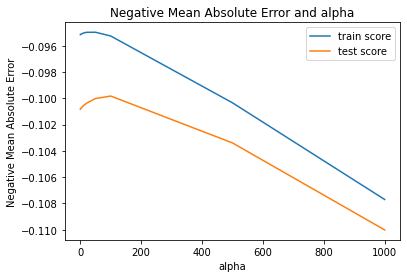

In [696]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [581]:
lmridge = Ridge(alpha=100)

lmridge.fit(X_train1_rfe, y_train)
# lm.fit(X_train1_rfe, y_train)

# predict
y_train_pred = lmridge.predict(X_train1_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmridge.predict(X_test1_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred))

0.8766714260010123
0.019395349848571167
0.8677325381864589
0.021763303579664176


In [580]:
model_parameters = list(lmridge.coef_)
model_parameters.insert(0, lmridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('MSSubClass', -0.024),
 ('LotFrontage', 0.001),
 ('LotArea', 0.022),
 ('OverallQual', 0.09),
 ('OverallCond', 0.036),
 ('BsmtQual', 0.018),
 ('BsmtFinType1', 0.019),
 ('BsmtFinSF1', 0.01),
 ('BsmtFinType2', -0.008),
 ('BsmtFinSF2', 0.015),
 ('TotalBsmtSF', 0.044),
 ('HeatingQC', 0.014),
 ('2ndFlrSF', 0.031),
 ('LowQualFinSF', 0.003),
 ('BsmtFullBath', 0.023),
 ('FullBath', 0.035),
 ('HalfBath', 0.017),
 ('KitchenAbvGr', -0.01),
 ('KitchenQual', 0.027),
 ('TotRmsAbvGrd', 0.052),
 ('FireplaceQu', 0.049),
 ('GarageArea', 0.046),
 ('MSZoning_0', 0.0),
 ('MSZoning_1', 0.006),
 ('MSZoning_2', -0.033),
 ('LotShape_0', -0.018),
 ('LandContour_0', 0.024),
 ('LandContour_1', 0.012),
 ('LandContour_2', 0.022),
 ('LotConfig_0', 0.0),
 ('LotConfig_1', 0.014),
 ('Neighborhood_0', 0.0),
 ('Neighborhood_1', -0.013),
 ('BldgType_0', 0.0),
 ('BldgType_2', 0.009),
 ('BldgType_3', -0.009),
 ('Condition1_0', 0.0),
 ('Condition1_4', 0.014),
 ('RoofStyle_0', 0.0),
 ('Foundation_3', 0

In [584]:

lmridge = Ridge(alpha=50)

lmridge.fit(X_train1_rfe, y_train)
# lm.fit(X_train1_rfe, y_train)

# predict
y_train_pred = lmridge.predict(X_train1_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmridge.predict(X_test1_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred))

0.8781686853439575
0.019159882366633844
0.8684150036483044
0.021651010633045784


In [587]:
model_parametersR = list(lmridge.coef_)
model_parametersR.insert(0, lmridge.intercept_)
model_parametersR = [round(x, 3) for x in model_parametersR]
cols = X_train1_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parametersR))

[('constant', 12.023),
 ('MSSubClass', -0.03),
 ('LotFrontage', -0.002),
 ('LotArea', 0.022),
 ('OverallQual', 0.096),
 ('OverallCond', 0.04),
 ('BsmtQual', 0.016),
 ('BsmtFinType1', 0.02),
 ('BsmtFinSF1', 0.008),
 ('BsmtFinType2', -0.011),
 ('BsmtFinSF2', 0.017),
 ('TotalBsmtSF', 0.046),
 ('HeatingQC', 0.013),
 ('2ndFlrSF', 0.034),
 ('LowQualFinSF', 0.004),
 ('BsmtFullBath', 0.024),
 ('FullBath', 0.035),
 ('HalfBath', 0.017),
 ('KitchenAbvGr', -0.012),
 ('KitchenQual', 0.025),
 ('TotRmsAbvGrd', 0.053),
 ('FireplaceQu', 0.049),
 ('GarageArea', 0.046),
 ('MSZoning_0', 0.0),
 ('MSZoning_1', 0.007),
 ('MSZoning_2', -0.034),
 ('LotShape_0', -0.018),
 ('LandContour_0', 0.03),
 ('LandContour_1', 0.017),
 ('LandContour_2', 0.029),
 ('LotConfig_0', 0.0),
 ('LotConfig_1', 0.013),
 ('Neighborhood_0', 0.0),
 ('Neighborhood_1', -0.014),
 ('BldgType_0', 0.0),
 ('BldgType_2', 0.012),
 ('BldgType_3', -0.012),
 ('Condition1_0', 0.0),
 ('Condition1_4', 0.015),
 ('RoofStyle_0', 0.0),
 ('Foundation_3', 0

### lasso 

In [697]:

folds = 10
# specify range of hyperparameters

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train1_rfe, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [556]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007076,0.001071,0.002017,0.000720,0.0001,{'alpha': 0.0001},0.907283,0.851187,0.879563,0.555401,0.854161,0.801559,0.898401,0.910895,0.891943,0.897319,0.844839,0.101450,2,0.874871,0.880829,0.877907,0.900849,0.880484,0.886361,0.876371,0.875528,0.875738,0.876166,0.880511,0.007551
1,0.005550,0.000783,0.001704,0.000190,0.001,{'alpha': 0.001},0.908874,0.852946,0.881840,0.549447,0.858952,0.800429,0.899154,0.908775,0.890893,0.897128,0.844914,0.103290,1,0.874256,0.880281,0.877349,0.900288,0.879885,0.885784,0.875818,0.874934,0.875186,0.875618,0.879940,0.007554
2,0.003939,0.000813,0.001141,0.000270,0.01,{'alpha': 0.01},0.897187,0.849385,0.877665,0.559204,0.861275,0.796937,0.895068,0.897669,0.875391,0.885893,0.839633,0.097720,3,0.860572,0.867387,0.863277,0.890511,0.865544,0.873654,0.862674,0.862101,0.861258,0.861944,0.866892,0.008693
3,0.003079,0.000686,0.001083,0.000402,0.05,{'alpha': 0.05},0.824640,0.791003,0.794769,0.634969,0.780344,0.751392,0.821433,0.806104,0.796456,0.801456,0.780310,0.052230,4,0.784959,0.794350,0.788273,0.815134,0.789765,0.796769,0.787934,0.791757,0.787328,0.788362,0.792463,0.008255
4,0.002555,0.000126,0.000933,0.000049,0.1,{'alpha': 0.1},0.676923,0.667365,0.636272,0.598955,0.631997,0.639800,0.672067,0.696729,0.665029,0.666935,0.655240,0.026744,5,0.655210,0.669142,0.661543,0.682402,0.660063,0.668489,0.658640,0.667586,0.654003,0.661176,0.663825,0.007958


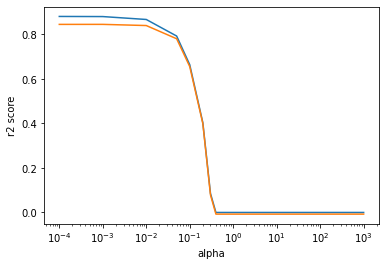

In [557]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [558]:
folds = 10

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train1_rfe, y_train) 



Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [559]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006929,0.002614,0.001436,0.000069,0.0001,{'alpha': 0.0001},-0.095641,-0.100503,-0.103967,-0.112768,-0.114162,-0.107524,-0.089671,-0.085513,-0.109850,-0.088148,-0.100770,0.010008,2,-0.096815,-0.096454,-0.095608,-0.086398,-0.095258,-0.093292,-0.096731,-0.097555,-0.095784,-0.097257,-0.095115,0.003128
1,0.005460,0.000707,0.001364,0.000290,0.001,{'alpha': 0.001},-0.095574,-0.100216,-0.103339,-0.114158,-0.112111,-0.106644,-0.088895,-0.086011,-0.110108,-0.087947,-0.100495,0.009921,1,-0.096442,-0.096197,-0.095454,-0.086586,-0.095231,-0.093157,-0.096626,-0.097382,-0.095583,-0.097080,-0.094974,0.003015
2,0.004576,0.001276,0.001360,0.000294,0.01,{'alpha': 0.01},-0.097457,-0.100773,-0.104835,-0.123855,-0.108788,-0.109348,-0.087351,-0.089329,-0.116859,-0.089517,-0.102804,0.011622,3,-0.100399,-0.099363,-0.099118,-0.090913,-0.098973,-0.096839,-0.100487,-0.100942,-0.099945,-0.100783,-0.098776,0.002859
3,0.003334,0.000652,0.001004,0.000128,0.05,{'alpha': 0.05},-0.127553,-0.121397,-0.138913,-0.148244,-0.134503,-0.135111,-0.114522,-0.124130,-0.135004,-0.124331,-0.130359,0.009315,4,-0.129717,-0.128583,-0.128659,-0.122262,-0.129376,-0.127622,-0.130494,-0.128606,-0.129556,-0.129756,-0.128463,0.002205
4,0.002532,0.000108,0.000897,0.000081,0.1,{'alpha': 0.1},-0.179488,-0.159635,-0.181947,-0.182431,-0.178647,-0.175687,-0.164808,-0.154880,-0.173249,-0.168563,-0.171929,0.009127,5,-0.171075,-0.169538,-0.170451,-0.165625,-0.171762,-0.169007,-0.172163,-0.169782,-0.172379,-0.170947,-0.170273,0.001880


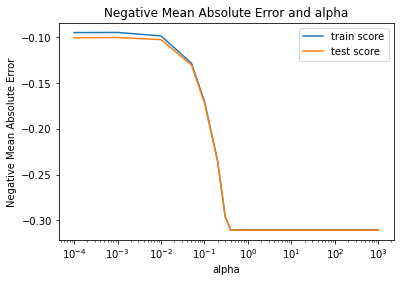

In [560]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [501]:
lm = Lasso(alpha=0.01)
lm.fit(X_train1_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train1_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred))

0.8654295748548958
0.021163307012547466
0.860155623533015
0.02301000999966462


In [502]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.0),
 ('LotArea', 0.019),
 ('OverallQual', 0.121),
 ('OverallCond', 0.025),
 ('BsmtQual', 0.013),
 ('BsmtFinType1', 0.022),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.04),
 ('HeatingQC', 0.012),
 ('2ndFlrSF', 0.015),
 ('LowQualFinSF', -0.0),
 ('BsmtFullBath', 0.02),
 ('FullBath', 0.028),
 ('HalfBath', 0.013),
 ('KitchenAbvGr', -0.0),
 ('KitchenQual', 0.023),
 ('TotRmsAbvGrd', 0.049),
 ('FireplaceQu', 0.045),
 ('GarageArea', 0.053),
 ('MSZoning_0', 0.0),
 ('MSZoning_1', 0.0),
 ('MSZoning_2', -0.035),
 ('LotShape_0', -0.006),
 ('LandContour_0', 0.0),
 ('LandContour_1', -0.0),
 ('LandContour_2', 0.0),
 ('LotConfig_0', 0.0),
 ('LotConfig_1', 0.008),
 ('Neighborhood_0', 0.0),
 ('Neighborhood_1', -0.003),
 ('BldgType_0', 0.0),
 ('BldgType_2', -0.0),
 ('BldgType_3', 0.0),
 ('Condition1_0', 0.0),
 ('Condition1_4', 0.007),
 ('RoofStyle_0', 0.0),
 ('Foundation_3', 0.0),
 ('GarageType_1',

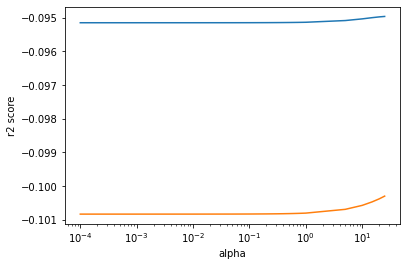

In [372]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [561]:
lm = Lasso(alpha=0.005)       
lm.fit(X_train1_rfe, y_train) 
y_train_pred = lm.predict(X_train1_rfe)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1_rfe)
print(r2_score(y_true=y_test, y_pred=y_test_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

0.8721499132356573
0.02010642854740995
0.8668908081562436
0.02190180193692092


In [562]:
lm.coef_

array([-1.21052607e-02,  0.00000000e+00,  2.27456728e-02,  1.14686236e-01,
        3.22622387e-02,  1.15140134e-02,  2.25894696e-02,  4.35769762e-05,
       -0.00000000e+00,  2.55082485e-03,  4.48822862e-02,  1.32059554e-02,
        2.34781351e-02,  0.00000000e+00,  2.47347210e-02,  3.08339893e-02,
        1.42807283e-02, -0.00000000e+00,  2.22127759e-02,  4.91286004e-02,
        4.68587860e-02,  5.04301766e-02,  0.00000000e+00,  0.00000000e+00,
       -3.56317328e-02, -1.28465442e-02,  5.88831317e-03,  0.00000000e+00,
        1.59471255e-03,  0.00000000e+00,  1.06362878e-02,  0.00000000e+00,
       -8.42740137e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.17494796e-02,  0.00000000e+00,  0.00000000e+00,
       -6.36598344e-03,  1.58348267e-02,  9.64435773e-03, -2.61777978e-02,
       -2.25964586e-02])

In [568]:

lm = Lasso(alpha=0.01)
lm.fit(X_train1_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train1_rfe)
print("Train r2 score",r2_score(y_true=y_train, y_pred=y_train_pred))
print("Train mean_squ_error",mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1_rfe)
print("Test r2 score",r2_score(y_true=y_test, y_pred=y_test_pred))
print("Test mean_squ_error" ,mean_squared_error(y_true=y_test, y_pred=y_test_pred))
# model with optimal alpha
# lasso regressionprint(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

Train r2 score 0.8654295748548958
Train mean_squ_error 0.021163307012547466
Test r2 score 0.860155623533015
Test mean_squ_error 0.02301000999966462


In [567]:
# model with optimal alpha
# lasso regression

lm1 = Lasso(alpha=0.001)
lm1.fit(X_train1_rfe, y_train)

# predict
y_train_pred = lm1.predict(X_train1_rfe)
print("Train r2 score",r2_score(y_true=y_train, y_pred=y_train_pred))
print("Train mean_squ_error",mean_squared_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test1_rfe)
print("Test r2 score",r2_score(y_true=y_test, y_pred=y_test_pred))
print("Test mean_squ_error" ,mean_squared_error(y_true=y_test, y_pred=y_test_pred))

Train r2 score 0.8784621268409339
Train mean_squ_error 0.01911373409531764
Test r2 score 0.8686836406167804
Test mean_squ_error 0.021606809074949013


In [700]:
model_parameters = list(lm1.coef_)
model_parameters.insert(0, lm1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('MSSubClass', -0.03),
 ('LotFrontage', -0.002),
 ('LotArea', 0.021),
 ('OverallQual', 0.106),
 ('OverallCond', 0.041),
 ('BsmtQual', 0.011),
 ('BsmtFinType1', 0.022),
 ('BsmtFinSF1', 0.003),
 ('BsmtFinType2', -0.008),
 ('BsmtFinSF2', 0.014),
 ('TotalBsmtSF', 0.048),
 ('HeatingQC', 0.013),
 ('2ndFlrSF', 0.035),
 ('LowQualFinSF', 0.003),
 ('BsmtFullBath', 0.027),
 ('FullBath', 0.033),
 ('HalfBath', 0.015),
 ('KitchenAbvGr', -0.01),
 ('KitchenQual', 0.021),
 ('TotRmsAbvGrd', 0.054),
 ('FireplaceQu', 0.049),
 ('GarageArea', 0.047),
 ('MSZoning_0', 0.0),
 ('MSZoning_1', 0.006),
 ('MSZoning_2', -0.034),
 ('LotShape_0', -0.018),
 ('LandContour_0', 0.032),
 ('LandContour_1', 0.019),
 ('LandContour_2', 0.033),
 ('LotConfig_0', 0.0),
 ('LotConfig_1', 0.012),
 ('Neighborhood_0', 0.0),
 ('Neighborhood_1', -0.013),
 ('BldgType_0', 0.0),
 ('BldgType_2', 0.01),
 ('BldgType_3', -0.013),
 ('Condition1_0', 0.0),
 ('Condition1_4', 0.015),
 ('RoofStyle_0', 0.0),
 ('Foundation_3', 

#### OverallQuality ,TotalRooms Above Grade, Garage Area , Fireplace Quality,  Overall Condition, Total Basement SquareFeet . are few of the predictors to be considered that may affect the price of the property.

In [74]:
houseDf['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [75]:
houseDf['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [76]:
houseDf['Heating'].describe()

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object

In [77]:
houseDf['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [78]:
houseDf['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [79]:
houseDf['Heating'].describe()

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object

In [80]:
houseDf['LotShape'].describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

In [ ]:
axis = 1, inplace = True

In [1]:
help(DecisionTreeClassifier)


NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
Overal Qula , livgr area ,year buit age ,